# Regression Lab 3: Regularization, SVM Regression and Logistic Regression


```
Module Coordinator : Akshit Garg
```


## Part A: Ridge and Lasso Regularization

In [131]:
import numpy as np
import pandas as pd
import random
import math

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 8

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

## Motivation behind regularization

Most, if not all real world data is noisy, i.e. there are outliers in the data which throw the model off during training. Let's look at a noisy sine wave as an example. We'll try to fit polynomials of various degree to the curve.

In [132]:
np.random.seed(10)

x = np.array([i*np.pi/180 for i in range(60,300,4)]).reshape((-1,1))
y = np.sin(x) + np.random.normal(0,0.15,x.shape)

In [133]:
def poly_regression(x,y,deg,show=True):

  poly = PolynomialFeatures(degree=deg)

  x_ = poly.fit_transform(x)
  poly.fit(x_,y)

  m1 = LinearRegression()
  m1.fit(x_,y)
  y_pred = m1.predict(x_)


  if show:
    plt.plot(x,y_pred,color="red")
    plt.title("Visualization of actual data vs predicted outputs (polynomial regression deg={})".format(deg))
    plt.scatter(x,y,color="blue")
    plt.legend(["predicted polynomial","actual data points"])
    plt.show()

    print("\n Coefficients obtained\n")
    print(m1.coef_)
    print("\n")

  return y_pred

For now, let's not think about how we obtain these coefficients. We'll look into how they are obtained in a later module.

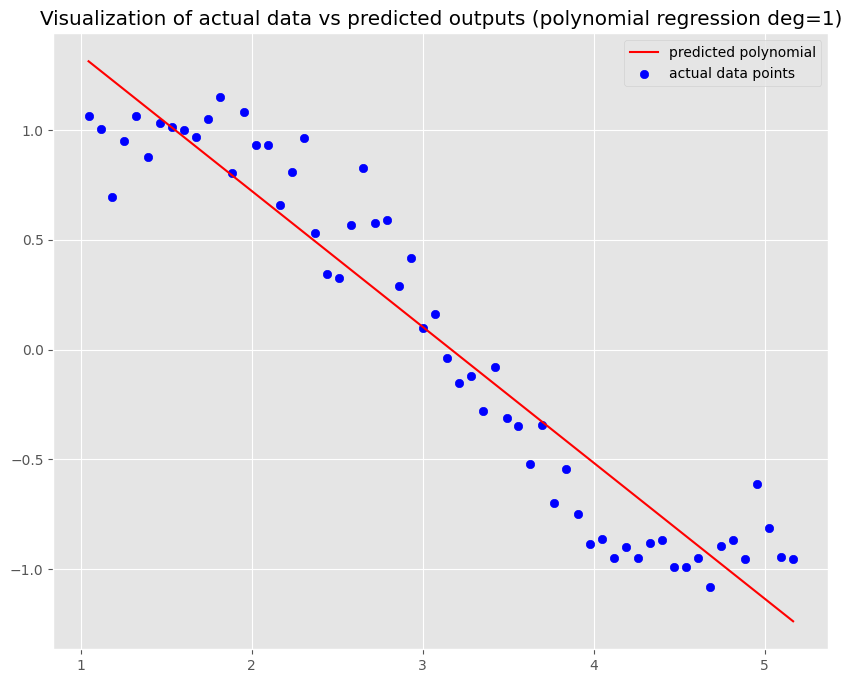


 Coefficients obtained

[[ 0.         -0.61957457]]




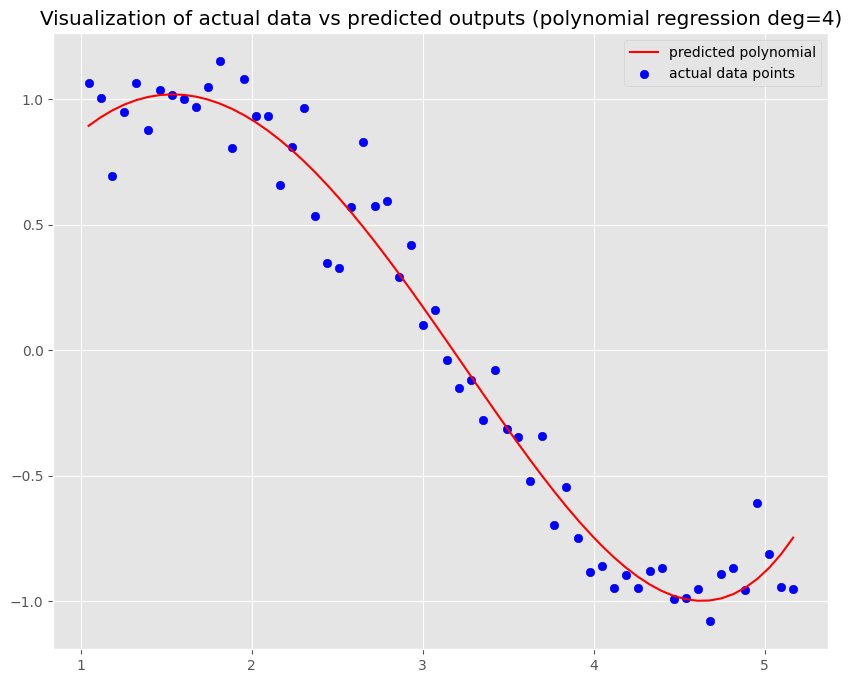


 Coefficients obtained

[[ 0.          1.68692165 -0.53175186 -0.03567846  0.01391921]]




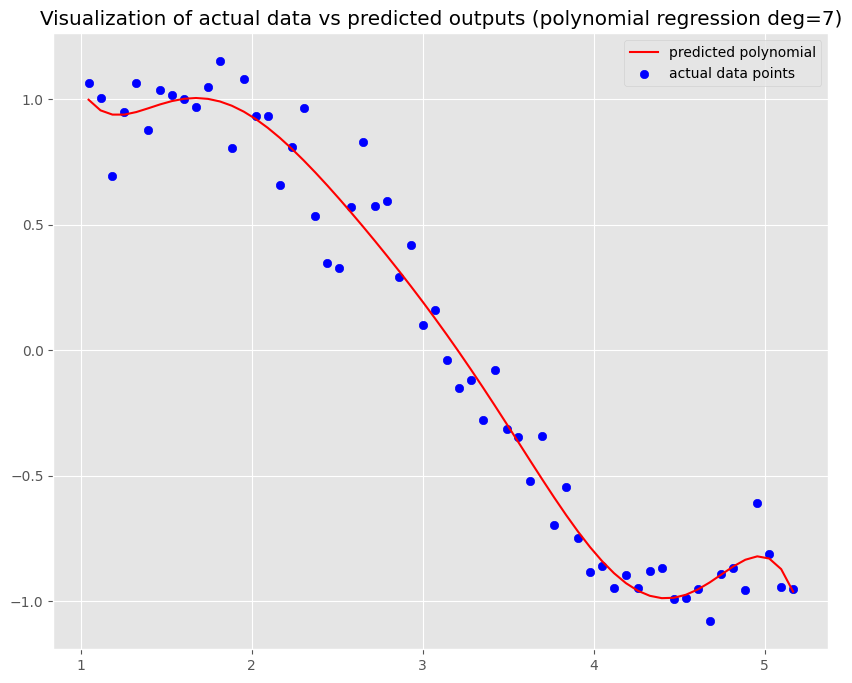


 Coefficients obtained

[[ 0.00000000e+00 -5.59523300e+01  6.89561793e+01 -4.46319058e+01
   1.65148424e+01 -3.52813549e+00  4.04509832e-01 -1.92268762e-02]]




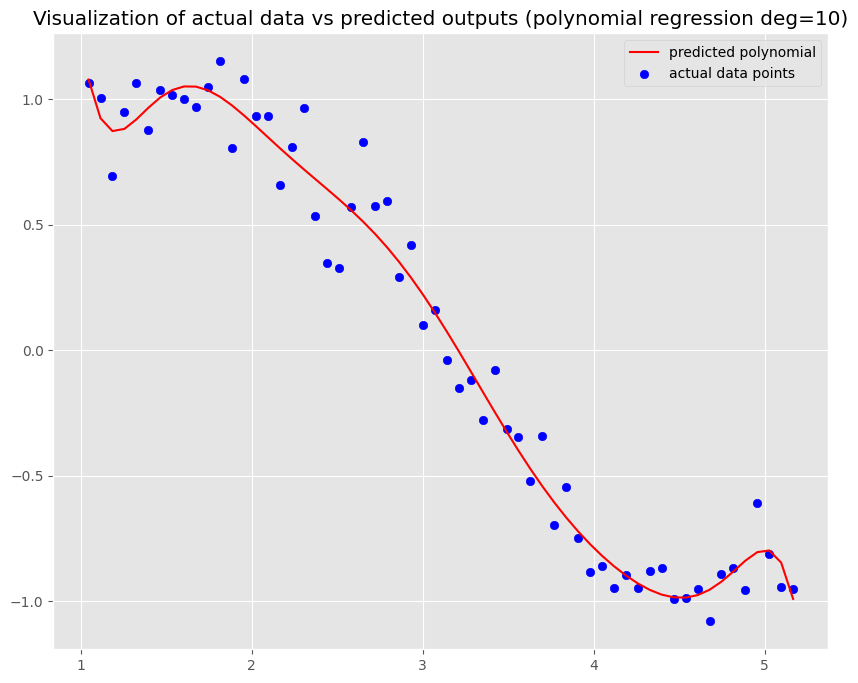


 Coefficients obtained

[[ 0.00000000e+00 -4.86125436e+02  7.26133286e+02 -5.95881204e+02
   2.93255837e+02 -8.74564585e+01  1.45461928e+01 -8.06079171e-01
  -1.38203819e-01  2.62230806e-02 -1.32095456e-03]]




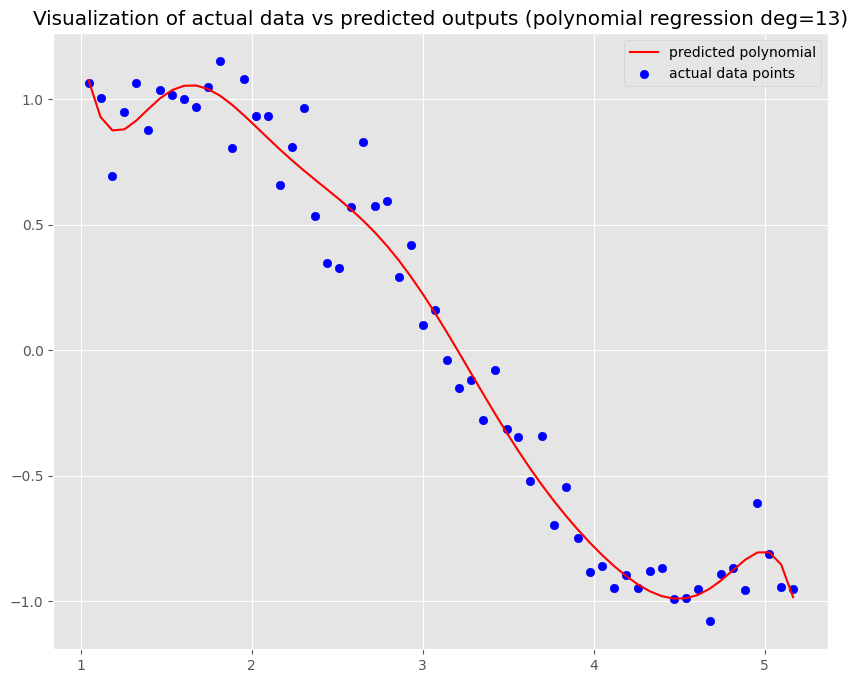


 Coefficients obtained

[[ 0.00000000e+00 -1.20901775e+02  5.00736786e+01  7.27324131e+01
  -5.64600592e+01 -4.13474096e+01  7.88655828e+01 -5.21574464e+01
   1.99430568e+01 -4.87943643e+00  7.78676260e-01 -7.87346339e-02
   4.59351098e-03 -1.18076316e-04]]




In [134]:
for deg in range(1,14,3):
  y_pred = poly_regression(x,y,deg)

This is exactly the same issue as we had seen previously in lab 1! The higher degree polynomials **overfit** the training data, by trying to capture noise in it. Though the model may do well on this set, if we try to fit the learnt curve to another noisy sine wave, it would result in a lower accuracy. Luckily, there's a way around this.

**Q:** What trend do you observe with respect to the coefficient values as degree grows?

\

**A:** The magnitudes of the coefficients go up drastically with degree!

\

Now, why does that happen? Intuitively, we can think about what the polynomial is trying to fit here. In the above example, the polynomial is trying to fit to a noisy sine wave. To approximate the large oscillations we see, the coefficients need to have large magnitudes. We can also see that this only happens with higher degree polynomials, since lower degree polynomials cannot even approximate these oscillations.

## Ridge Regression

Ridge regression works by adding a term to the loss function which is proportional to the sum of the squared coefficients of the model.

$L_r = \sum_{i=1}^{N} (y - y_p) ^2 + \alpha |w|^2$,

where $\sum_{i=1}^{N} (y - y_p) ^2$ is the typical mean-squared error loss and $\alpha |w|^2$ is the regularization term, $w$ being the coefficient of the term. We can see that it penalizes the squared value of the coefficients.

In [135]:
def ridge_regression(x,y,deg,alpha):

  poly = PolynomialFeatures(degree=deg)
  x_ = poly.fit_transform(x.reshape(-1,1))

  r = Ridge(alpha)
  r.fit(x_,y)

  y_pred_ridge = r.predict(x_)

  plt.title("Ridge Regressed polynomial deg={}, alpha={}".format(deg,alpha))
  plt.scatter(x,y,color="blue")
  plt.plot(x,y_pred_ridge,color="red")
  plt.legend(["actual data","predicted data"])
  plt.show()

  print("\n Coefficients obtained\n")
  print(r.coef_)
  print("\n")

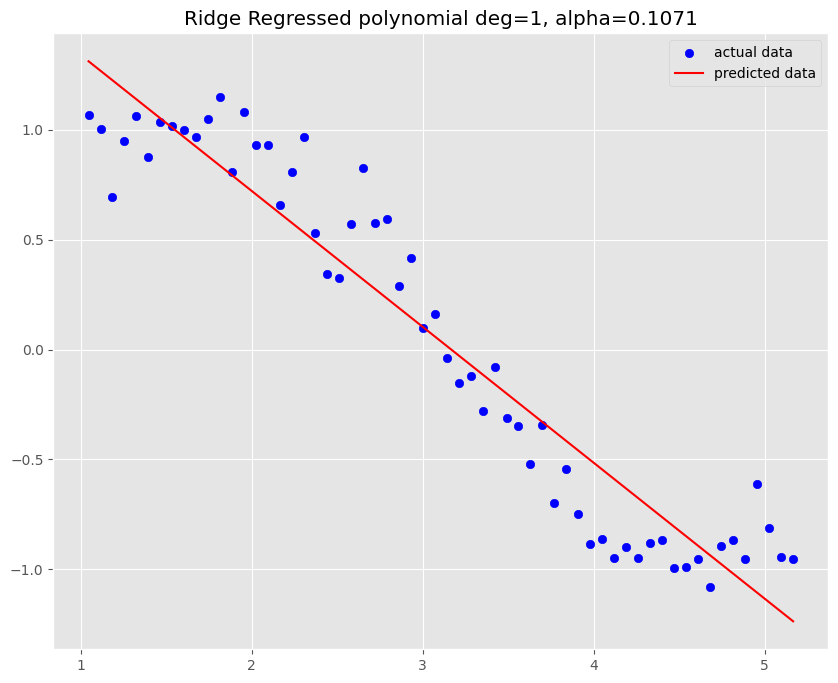


 Coefficients obtained

[ 0.         -0.61881891]




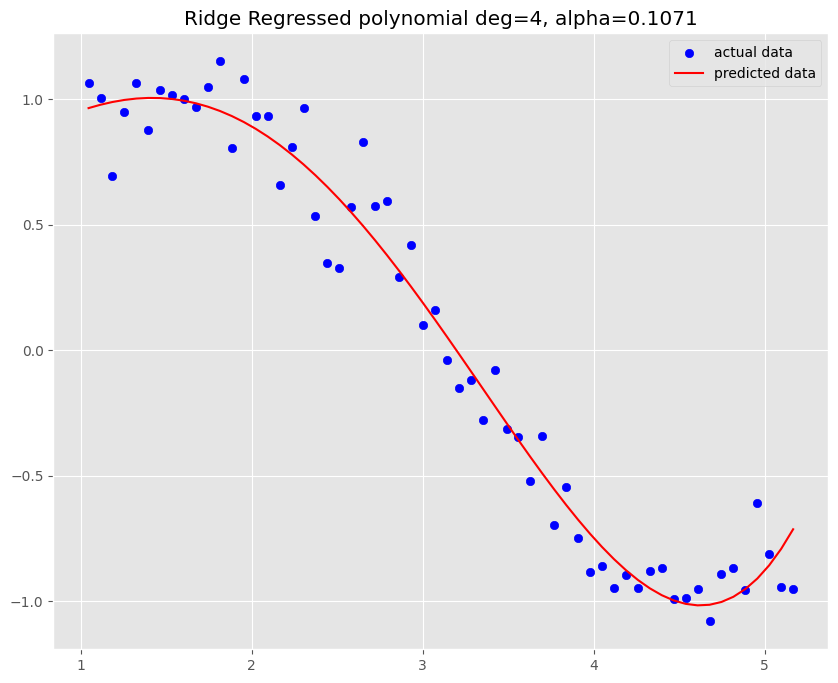


 Coefficients obtained

[ 0.          0.30188953  0.21094154 -0.19959144  0.0266774 ]




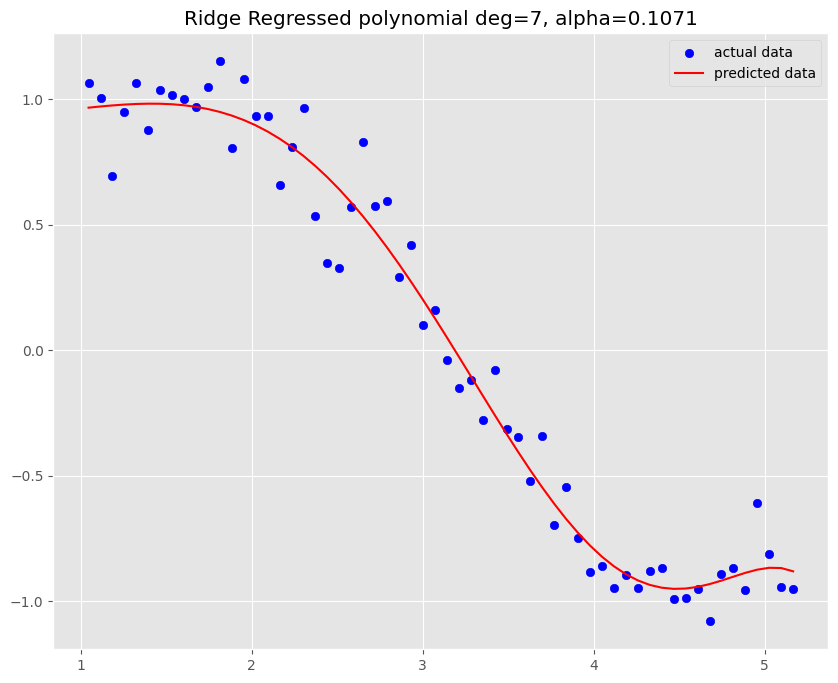


 Coefficients obtained

[ 0.          0.03438837  0.02018269 -0.00435679  0.04489806 -0.04701382
  0.012505   -0.001004  ]




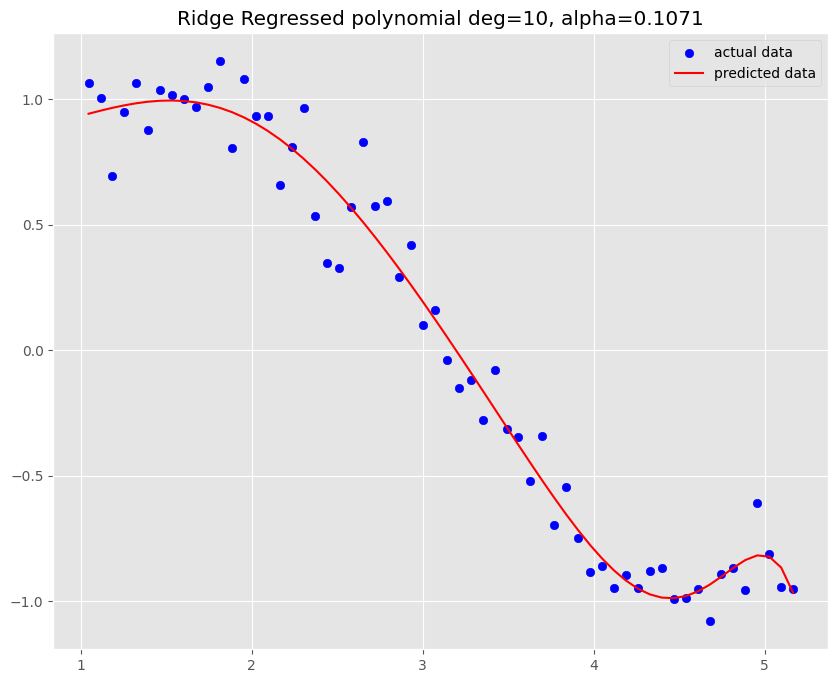


 Coefficients obtained

[ 0.00000000e+00  2.68955263e-02  5.75070145e-02  5.95529557e-02
  1.59589293e-02 -3.71672898e-02 -2.59604182e-02  2.98333743e-02
 -9.97896234e-03  1.46776290e-03 -8.17426834e-05]




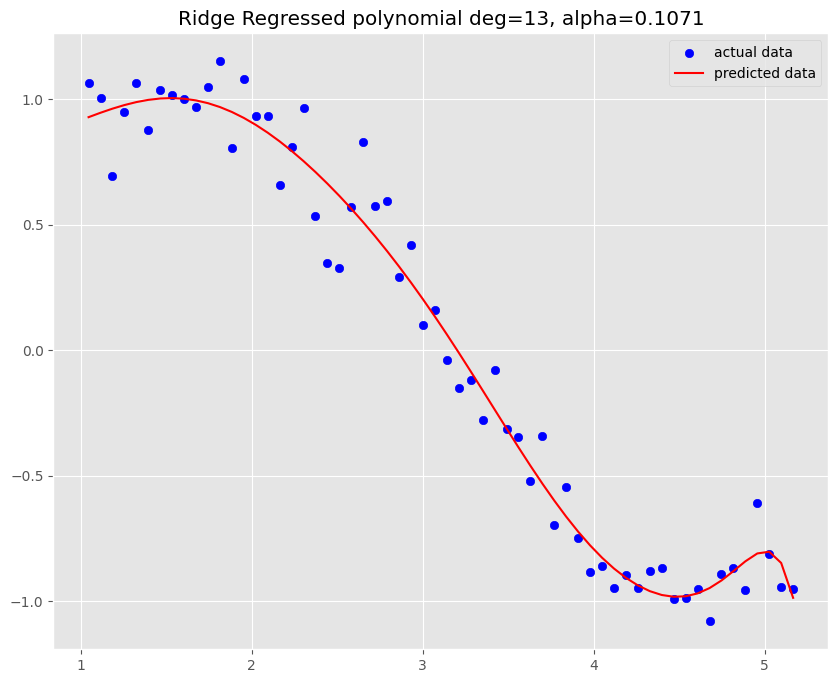


 Coefficients obtained

[ 0.00000000e+00  1.45512197e-02  5.42246973e-02  8.53418260e-02
  6.41112160e-02 -1.85741857e-02 -8.40405369e-02 -1.61614912e-02
  9.10364783e-02 -6.15902044e-02  1.99992131e-02 -3.56049018e-03
  3.35403972e-04 -1.31286554e-05]




In [136]:
alpha = 0.1071 #@param {type:"slider", min:0, max:1, step:0.0001}

for deg in range(1,14,3):
  ridge_regression(x,y,deg,alpha=alpha)

## Lasso Regression

Lasso regression is similar to ridge regression, except it penalizes the absolute value of the weights.

$L_l = \sum_{i=1}^{N} (y - y_p) ^2 + \alpha |w|$

In [137]:
def lasso_regression(x,y,deg,alpha):

  poly = PolynomialFeatures(degree=deg)
  x_ = poly.fit_transform(x.reshape(-1,1))

  l = Lasso(alpha)
  l.fit(x_,y)

  y_pred_lasso = l.predict(x_)

  plt.title("Lasso Regressed polynomial deg={}, alpha={}".format(deg,alpha))
  plt.scatter(x,y,color="blue")
  plt.plot(x,y_pred_lasso,color="red")
  plt.legend(["actual data","predicted data"])
  plt.show()

  print("\n Coefficients obtained\n")
  print(l.coef_)
  print("\n")

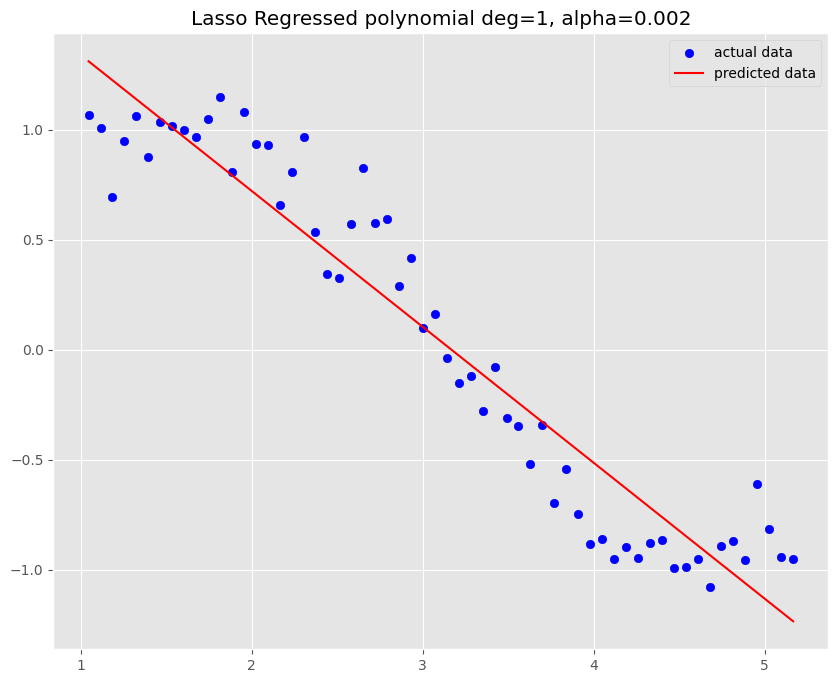


 Coefficients obtained

[ 0.         -0.61820636]




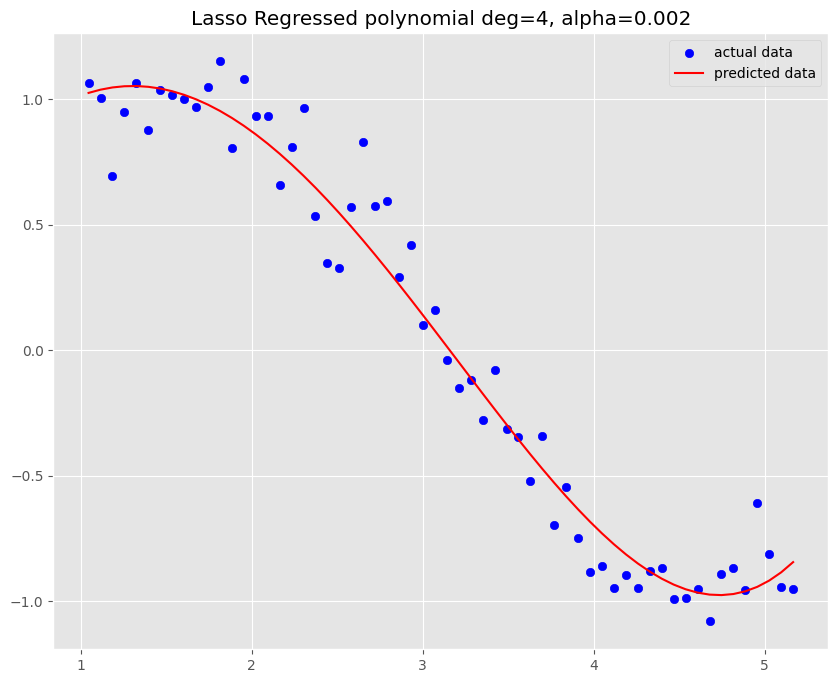


 Coefficients obtained

[ 0.          1.13526077 -0.43324846 -0.01773593  0.00979808]




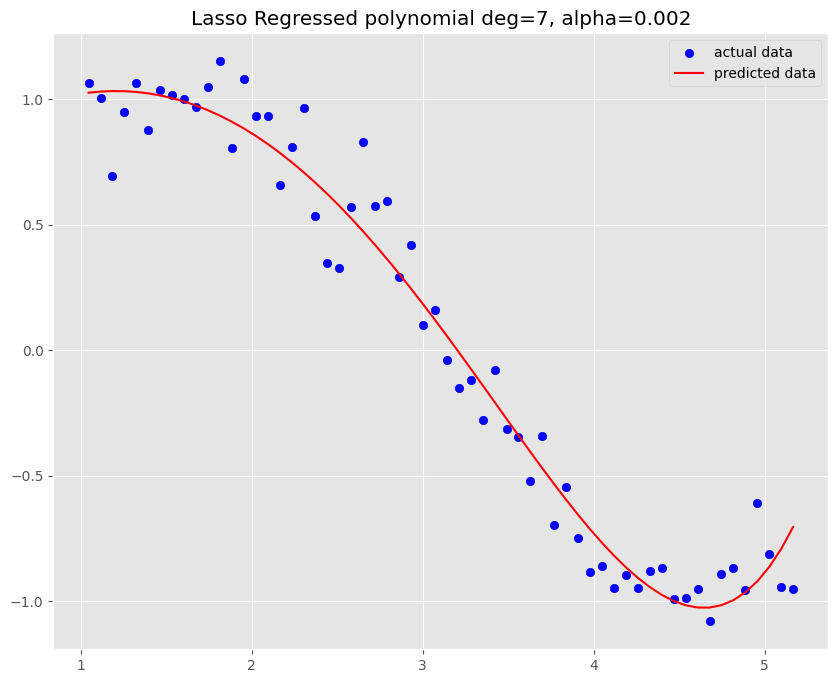


 Coefficients obtained

[ 0.00000000e+00  5.12763328e-01 -1.61718711e-01 -2.95013738e-02
  1.26694712e-04  4.28141875e-04  8.64159301e-05  1.04072759e-05]




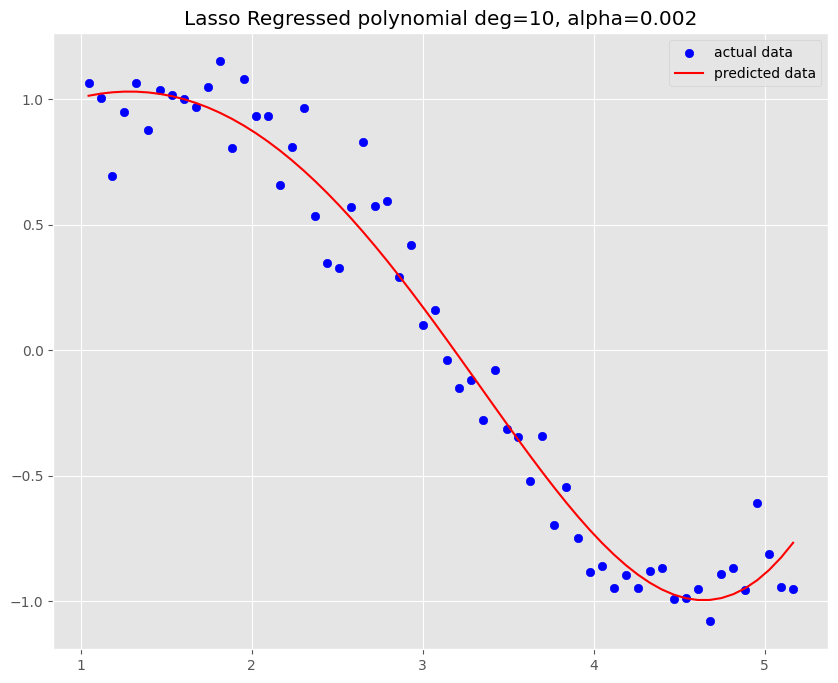


 Coefficients obtained

[ 0.00000000e+00  6.39356796e-01 -1.90784421e-01 -3.20456484e-02
  1.40347852e-04  5.02172611e-04  1.08046495e-04  1.54497698e-05
  1.33824720e-06 -8.99545056e-08 -8.20909321e-08]




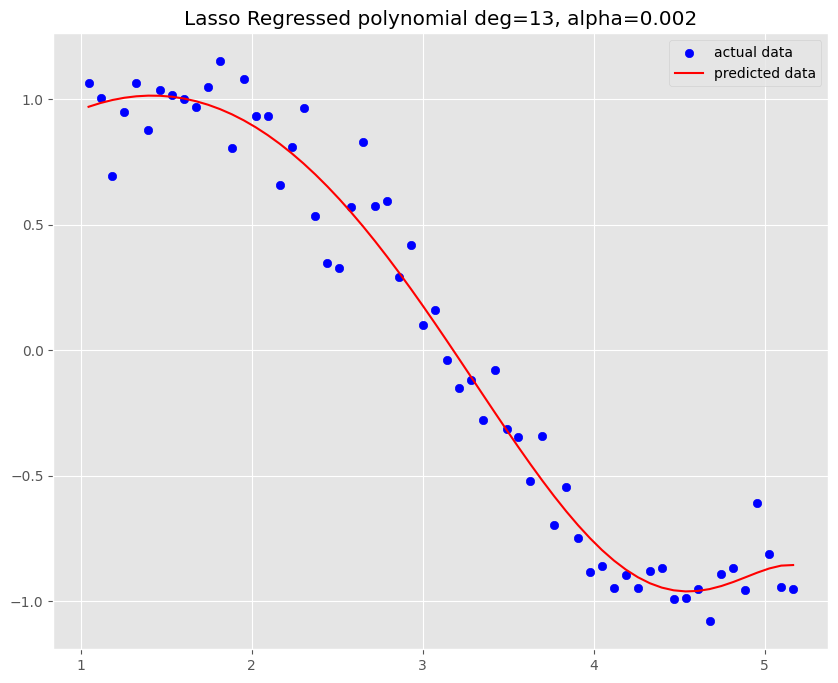


 Coefficients obtained

[ 0.00000000e+00  7.54448775e-01 -1.90058927e-01 -3.64216396e-02
 -7.57878296e-04  3.86123852e-04  1.08606281e-04  1.98422988e-05
  2.93112180e-06  3.37312127e-07  1.86605348e-08 -4.98258208e-09
 -2.46823081e-09 -7.32387421e-10]




In [138]:
alpha = 0.002 #@param {type:"slider", min:0, max:0.01, step:0.001}

for deg in range(1,14,3):
  lasso_regression(x,y,deg,alpha=alpha)

### Feature selection

Sometimes, data may contain features that are not relevant to the model; they do not contribute to the model's predictions. Naturally, we would want to get rid of such features in our data. **Feature selection** is a process by which we understand which features are actually relevant to the model and remove the unrelated features from our data.

The advantage of lasso regularization over ridge regularization is that it does a better job of feature selection. In ridge regression, the coefficient can approach zero, but never truly reaches zero. Hence, the model cannot perform feature selection.

In lasso regression, since we are penalizing the absolute value of the coefficient, the feature can have a zero coefficient, which is the same as feature selection. In the above example, we can clearly see the feature selection process in action, with higher degree polynomials have zero-valued coefficients for some of the terms.

## Applying regularization to the crime dataset

In [139]:
src = 'http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'
crime = pd.read_csv(src, header=None, na_values=['?'])

crime.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [140]:
crime.drop([0, 1, 2, 3, 4], axis=1, inplace=True)
crime.dropna(inplace=True)

# checking for any null values
crime.isnull().any().any()

False

In [141]:
def lin_regression(x,y,show=True):

  # learning the coefficient and intercept

  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

  m1 = LinearRegression()
  m1.fit(x_train,y_train)

  y_pred = m1.predict(x_test)
  metrics.mean_squared_error(y_pred,y_test)

  # plotting data and predictions

  if show:

    print("The coefficients are: \n {} \n\n The intercept is: {}\n".format(m1.coef_,m1.intercept_))
    print("The RMSE for linear regression is: {}".format(math.sqrt(metrics.mean_squared_error(y_pred,y_test))))

In [142]:
x_crime = crime.drop(127,axis=1)
y_crime = crime[127]

lin_regression(x_crime,y_crime)

The coefficients are: 
 [-3.62199499e+00  1.79147875e+00  1.23989416e-01  6.10868138e-01
 -9.74240317e-02  5.46270872e-03 -8.40520330e-01 -1.95759662e+00
  1.39731317e+00  9.54198648e-01  4.02060226e+00 -2.30858822e-01
 -5.10594166e-01 -2.94370481e-01 -3.60748140e-01 -8.34422289e-01
 -1.13705864e+00  3.21289051e-01  1.04297377e-02  1.34499080e+00
 -1.42507894e+00  5.58868500e-01 -3.56355865e-01 -1.07216082e-01
 -1.73896378e-01 -5.29481787e-02  2.12058345e-01 -4.27160630e-01
  1.08881974e+00 -2.64935584e-01 -9.26037495e-01 -6.93050187e-02
  2.64739839e-01  9.85791437e-01 -1.07959236e-01  2.97940967e-01
  5.45702125e-01  1.73641628e-01 -1.99286092e-01 -2.84909052e-01
  2.43156926e-02 -6.13403791e-01  3.48799633e-01 -6.13089866e-01
 -7.52098447e-01 -6.25872383e-02  2.50065633e-01 -4.63277459e-02
 -3.89760741e-03 -5.53359644e-02 -5.98457315e-02 -2.28122223e-01
  4.10293743e-01 -6.30234536e-01  9.46276358e-03  4.74980895e-01
 -2.71729939e-01 -4.21464410e-01  1.45486931e+00 -1.50189290e+00
 

In [143]:
x_train,x_test,y_train,y_test = train_test_split(x_crime,y_crime,test_size=0.3)

In [144]:
r = Ridge(alpha=0.2)
r.fit(x_train,y_train)
y_pred_ridge = r.predict(x_test)

print("The coefficients are: \n {}".format(r.coef_))
print("The RMSE for ridge regression is: {}".format(math.sqrt(metrics.mean_squared_error(y_pred_ridge,y_test))))

The coefficients are: 
 [-0.08518583  0.04391129  0.10374369 -0.01056266 -0.06749505  0.14312077
  0.1030154  -0.08219455 -0.03961348  0.05006168 -0.01514117 -0.05879383
  0.13233272 -0.14696708 -0.13083701 -0.51196009 -0.05106629  0.04927501
 -0.10341093  0.12238583 -0.09244106  0.16065292 -0.12998795 -0.12534916
  0.00078748 -0.12715886  0.05278143 -0.09794379  0.01499238 -0.27004401
 -0.12926026  0.00907421  0.22568244  0.10633297 -0.16101888  0.12331
  0.187477   -0.00066324 -0.13284806 -0.06469154 -0.08369257 -0.10322324
  0.09189042 -0.24977595 -0.24359532 -0.09834194  0.02194074 -0.18610513
  0.17784174  0.11503554  0.1875798  -0.19579375 -0.05883379 -0.04786085
  0.07161956  0.08525555 -0.02953552  0.01095279  0.07261166 -0.08392179
 -0.0207622  -0.00053875 -0.00403174 -0.10098932  0.0168383   0.09232302
 -0.07433785 -0.00438609  0.11981395  0.23331091 -0.11064087  0.05499343
  0.018005    0.03276185 -0.0453606   0.0669007  -0.10654718 -0.18799007
 -0.12859562 -0.00252894 -0.14

In [145]:
l = Lasso(alpha=0.002)
l.fit(x_train,y_train)
y_pred_lasso = l.predict(x_test)

print("The coefficients are: \n {}".format(l.coef_))
print("The RMSE for lasso regression is: {}".format(math.sqrt(metrics.mean_squared_error(y_pred_lasso,y_test))))

The coefficients are: 
 [ 0.         -0.          0.10856902 -0.1223128  -0.          0.04321642
  0.         -0.         -0.          0.          0.          0.
 -0.         -0.         -0.         -0.          0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.          0.          0.         -0.
 -0.         -0.          0.12263844 -0.         -0.06134713  0.
  0.         -0.          0.         -0.          0.          0.
  0.         -0.17628344 -0.         -0.14693837 -0.         -0.
 -0.          0.          0.13261061 -0.         -0.         -0.
  0.          0.          0.          0.          0.          0.
 -0.          0.          0.          0.          0.          0.
 -0.          0.          0.          0.         -0.06951425  0.03019944
 -0.         -0.          0.04180079  0.         -0.          0.
 -0.         -0.         -0.         -0.         -0.04206416 -0.
 -0.         -0.         -0.         -0.         -

## Part B: SVM Regression

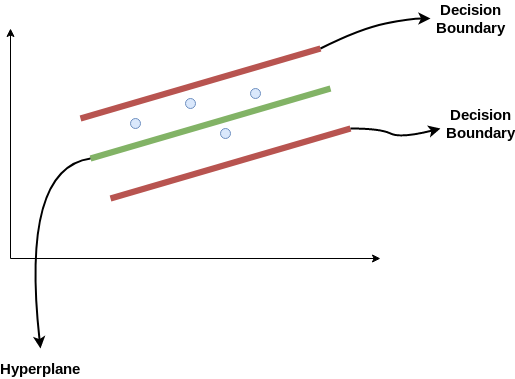

We know that the SVM algorithm works by finding a dividing hyperplane between the two classes in some feature space. How do we apply that concept to the task of regression?

The key insight is that we can define a parameter $ϵ$ which defines a "tube" around the hyperplane (in the diagram, the green line is the hyperplane and the two red lines determine the tube around it. Each red line is $ϵ$ units away from the hyperplane. We then define a "slack" term $ξ$ which measures the distance between the decision boundary (red line) and outliers (points outside the tube). In the code below, the variable `C` represents the slack term.

We can thus define an optimization problem of minimizing the $ξ$ value while trying to fit as many points in the tube as possible.

In [146]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
import sklearn.datasets as datasets


import plotly.graph_objects as go
import plotly.express as px


data = datasets.load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)

scaler=MinMaxScaler()
for col in df.columns[:-1]:
  df[col]=scaler.fit_transform(df[[col]])

In [147]:
X=df[df.columns[2]].values.reshape(-1,1)
y=df[df.columns[-1]].values

model1 = LinearRegression()
lr = model1.fit(X, y)

epsilon = 0.5
model2 = SVR(kernel='rbf', C=1, epsilon=epsilon)
svr = model2.fit(X, y)

In [148]:
x_range = np.linspace(X.min(), X.max(), 100)

y_lr = model1.predict(x_range.reshape(-1, 1))
y_svr = model2.predict(x_range.reshape(-1, 1))

In [149]:
fig = px.scatter(df, x=df[df.columns[2]], y=df[df.columns[-1]],
                 opacity=0.8, color_discrete_sequence=['black'])

fig.add_traces(go.Scatter(x=x_range, y=y_lr, name='Linear Regression', line=dict(color='limegreen')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr, name='Support Vector Regression', line=dict(color='red')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr+epsilon, name='+epsilon', line=dict(color='red', dash='dot')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr-epsilon, name='-epsilon', line=dict(color='red', dash='dot')))

fig.update_layout(dict(plot_bgcolor = 'white'))


fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey',
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey',
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey',
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey',
                 showline=True, linewidth=1, linecolor='black')

fig.update_traces(marker=dict(size=3))

fig.show()

## Part C: Logistic Regression

Just as we have linear and polynomial regression for predicting numerical values, we have another type of regression for predicting class labels of data, namely **logistic regression**.

The reason its called logistic regression is because it makes use of the logistic function to generate output values. The logistic function is defined as:

$g(z) = \frac{1}{1 + e^{-z}}$

\

The reason we use the logistic function is because its range is bounded between 0 and 1. Anything else comes to mind when talking about values between 0 and 1? Probabilities! And we saw in lab 2 how deeply related probability and classification are.

## Why use logistic function? Why not use linear regression?

Let's see why we can't use linear regression for classification tasks with the help of an example.

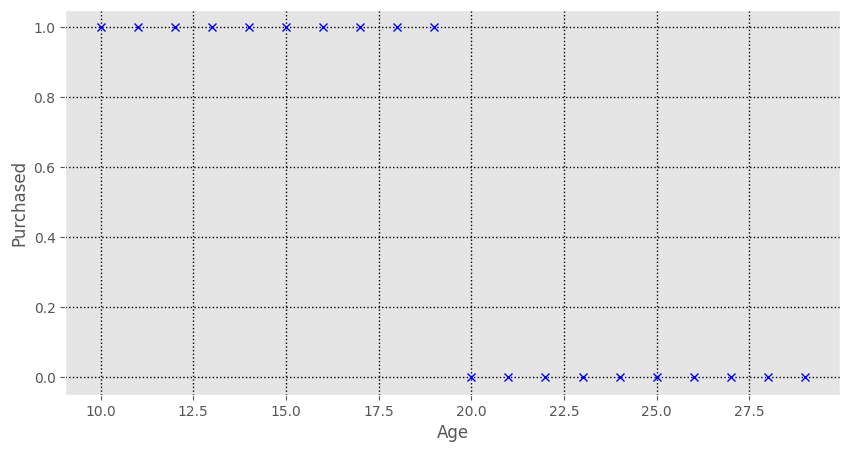

In [150]:
x = np.array([i for i in range(10,30)])
y = np.concatenate([np.ones(10), np.zeros(10)])

fig = plt.figure(figsize=(10,5))
xlabel = 'Age'
ylabel = 'Purchased'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid(color='k', linestyle=':', linewidth=1)
_ = plt.plot(x, y, 'xb')

Suppose we have some product, and we collected data on the relationship between the age of a customer, and whether they purchased the item or not. Customers aged between 10 and 19 made the purchase (purchased=1), whereas those customers above the age of 19 did not (purchased=0).

\

Now, let's try and fit linear regression and logistic regression models to this data, and test it.

In [151]:
def linear_regression(x,y):

  lin_regression = LinearRegression()
  lin_regression.fit(pd.DataFrame(x), y)

  lin_y_pred_1 = lin_regression.predict(pd.DataFrame(x))

  line_point_5 = x * 0 + .5

  fig = plt.figure(figsize=(10,5))
  xlabel = 'Age'
  ylabel = 'Purchased'
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.grid(color='k', linestyle=':', linewidth=1)
  plt.plot(x, y, 'xb')
  plt.plot(x, lin_y_pred_1, '-r')
  plt.plot(x, line_point_5,'-g')
  plt.legend(["Data Points","Linear Regression Model","Decision Boundary"])
  plt.show()

  return lin_regression

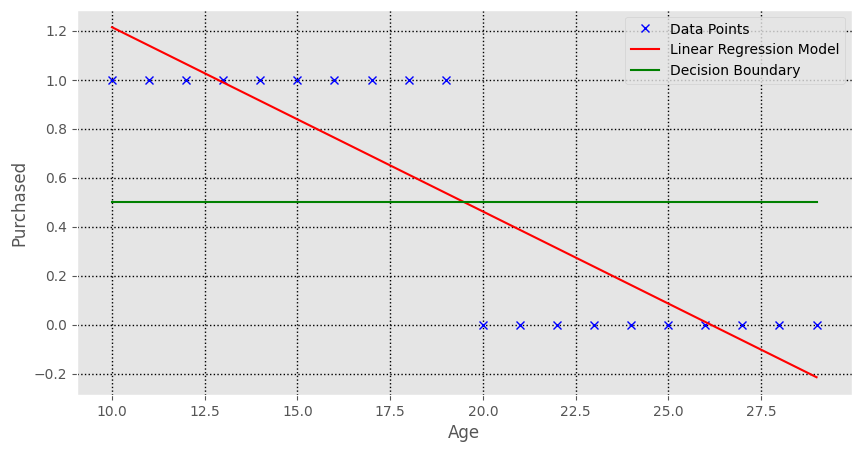

In [152]:
lin_regression = linear_regression(x,y)

The green line is called the decision boundary, which is basically the line that divides the two classes on the cartesian plane.

In [153]:
test_x = np.array([i for i in range(10,35,5)])
test_y_pred = lin_regression.predict(pd.DataFrame(test_x))
test_y_pred

array([ 1.21428571,  0.83834586,  0.46240602,  0.08646617, -0.28947368])

Since linear regression predictions are not probabilities, values greater than 0.5 are considered to belong to positive purchase class.

In [154]:
def logistic_regression(x,y):

  log_regression = LogisticRegression()

  log_regression.fit(pd.DataFrame(x), y)

  y_pred = log_regression.predict_proba(pd.DataFrame(x))
  log_y_pred_1 = [item[1] for item in y_pred]

  line_point_5 = x * 0 + .5

  fig = plt.figure(figsize=(10,5))
  xlabel = 'Age'
  ylabel = 'Purchased'
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.grid(color='k', linestyle=':', linewidth=1)
  plt.plot(x, y, 'xb')
  plt.plot(x, log_y_pred_1, '-r')
  plt.plot(x, line_point_5,'-g')
  plt.legend(["Data Points","Logistic Regression Model","Decision Boundary"])
  plt.show()

  return log_regression

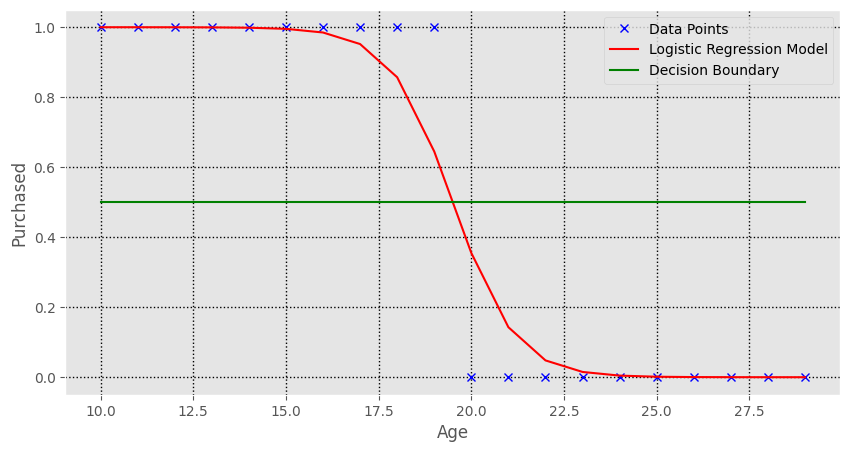

In [155]:
log_regression = logistic_regression(x,y)

**Q:** What do you observe from the two graphs? Hint: think in terms of the decision boundary....

**A:** According to the linear regression model, any age greater than 19 would belong to class 0 (no purchase), and any age less than or equal to 19 would belong to class 1 (purchase made). The logistic regression curve follows the same trend. We can think of the age 19 as a turning point of sorts.

Now, say we've collected more data the next day, and add the new data to the existing data we had from day 1. We find that customers aged between 60 and 70 did not make a purchase, which is aligned with our earlier data as well.

In [156]:
x = np.append(x, np.array([i for i in range(60,70)]))
y = np.append(y, np.zeros(10))

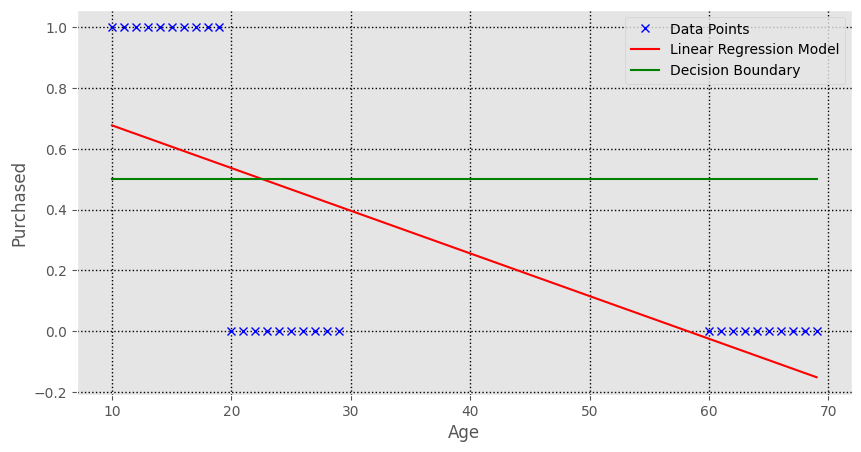

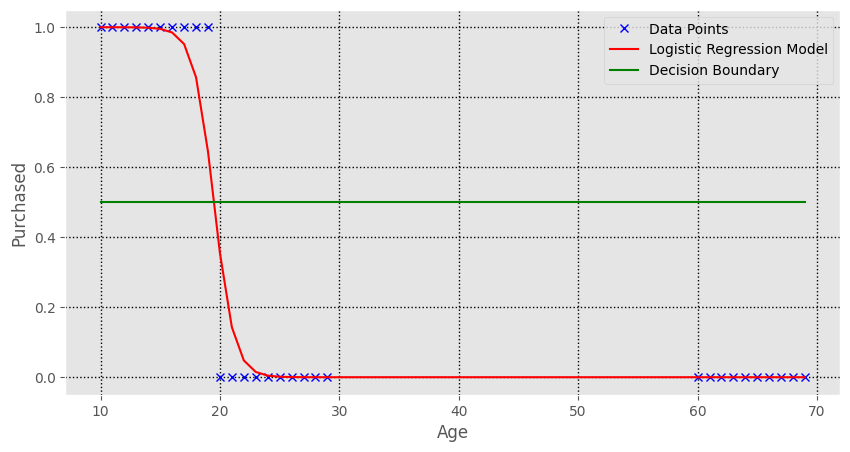

In [157]:
lin_regression = linear_regression(x,y)
log_regression = logistic_regression(x,y)

In [158]:
test_x = np.array([i for i in range(18,26)])

test_y_pred_lin = lin_regression.predict(pd.DataFrame(test_x))
print("Linear Regression Predictions:")
print(test_y_pred_lin)

test_y_pred_log = log_regression.predict_proba(pd.DataFrame(test_x))[:,1]
print("Logistic Regression Predictions:")
print(test_y_pred_log)

Linear Regression Predictions:
[0.56495292 0.55091537 0.53687781 0.52284026 0.50880271 0.49476516
 0.48072761 0.46669006]
Logistic Regression Predictions:
[0.85708321 0.6449927  0.35501405 0.1429204  0.04808915 0.01507413
 0.00461527 0.00140273]


We can now see where linear regression fails. The model tries to fit as many points as it can. By doing so, the turning point which was earlier 19 has now increased to 23, which is clearly wrong for the values 20, 21 and 22, which can be seen from the predictions on the test data.

\

On the other hand, the logistic regression model predicts the classes correctly, and perfectly models the relationship between the data.

What we can conclude from these observations are that a probabilistic model is required for classification problems. Lab 2 covered the intuition behind MLE, cross-entropy and classification, and so now you should be able to appreaciate the motivation behind logistic regression.

## Applying logistic regression to MNIST digit Dataset

Let's see logistic regression in action with the MNIST digits dataset.

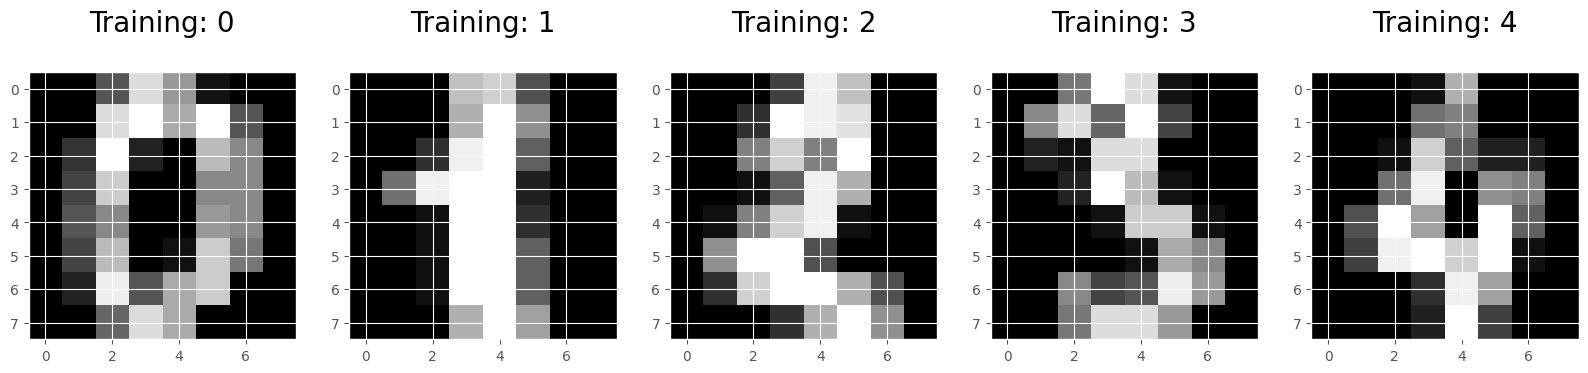

In [159]:
# initializing and visualizing MNIST data

digits = load_digits()

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [160]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)
log_reg = LogisticRegression()
log_reg = log_reg.fit(x_train,y_train)

PREDICTIONS:

[2 8 2 6 6 7 1 9 8 5]




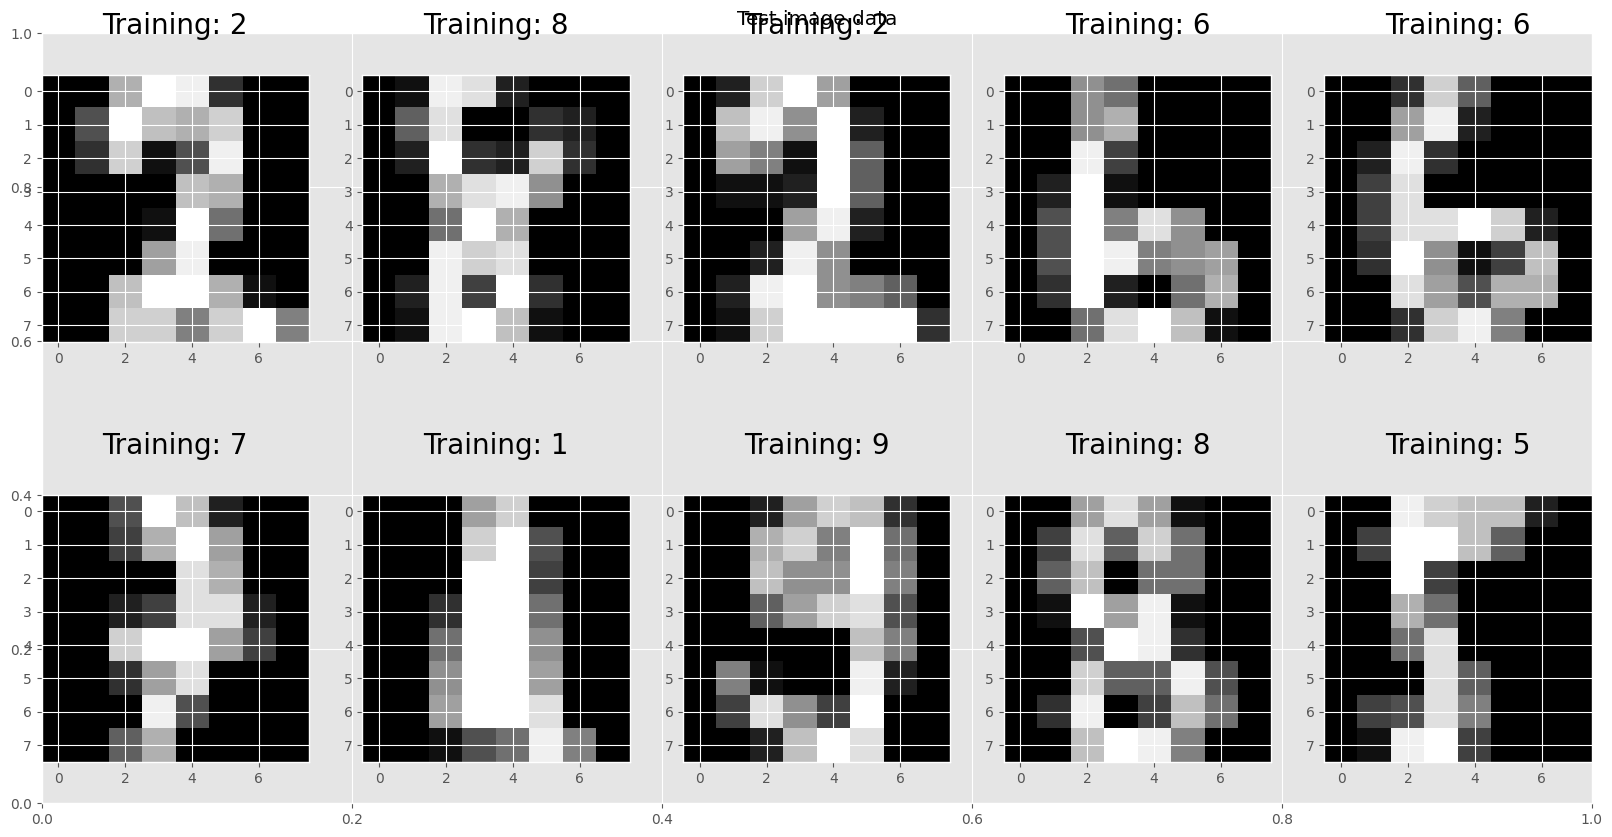

In [161]:
y_pred = log_reg.predict(x_test)

print("PREDICTIONS:\n")
print(y_pred[:10])
print("\n")

plt.figure(figsize=(20,10))
plt.title("Test image data")

for index, (image, label) in enumerate(zip(x_test[0:10], y_test[0:10])):
 plt.subplot(2, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [162]:
# Accuracy

acc = log_reg.score(x_test,y_test)
print("Accuracy obtained on test set: {}".format(round(acc*100,3)))

Accuracy obtained on test set: 96.667


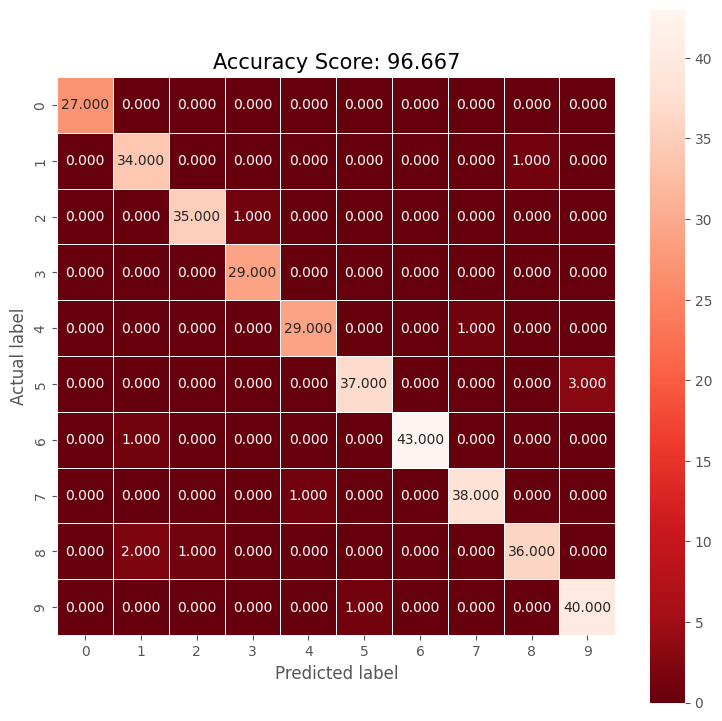

In [163]:
# Visualizing confusion matrix

cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(acc*100,3))
plt.title(all_sample_title, size = 15);

**# Exercises**

#**Regularization:**

1) Play with the values of alpha in both regularization techniques, and try to predict the outcomes.

2) Try the regularizations on different datasets to see the effect in various ways.

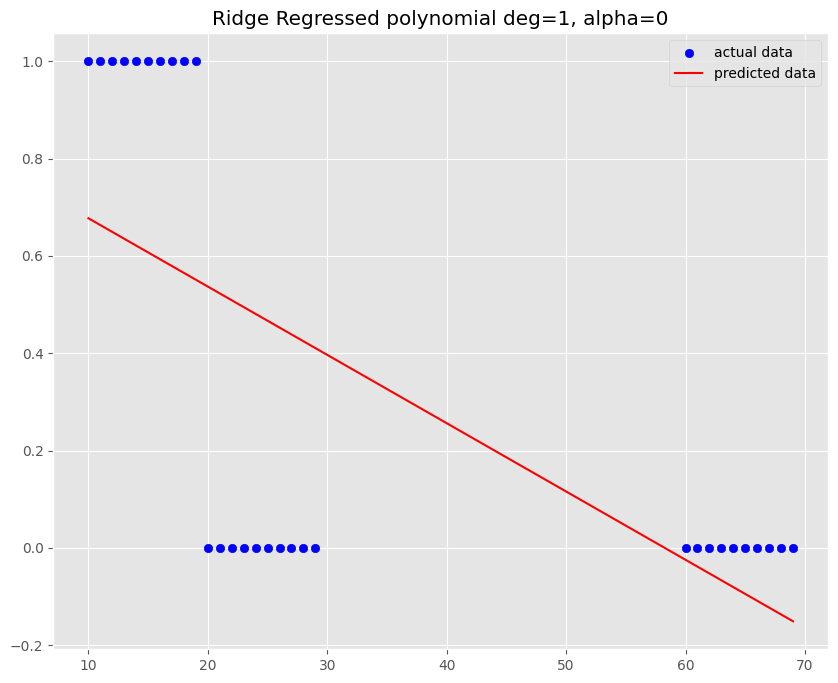


 Coefficients obtained

[ 0.         -0.01403755]




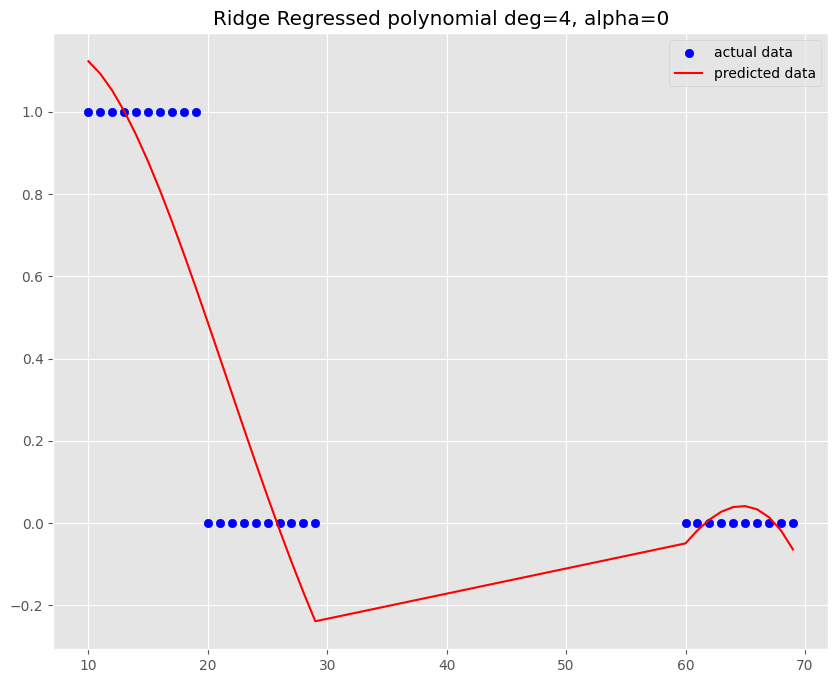


 Coefficients obtained

[ 0.00000000e+00  1.59743986e-01 -1.31167751e-02  2.83039247e-04
 -1.86136747e-06]




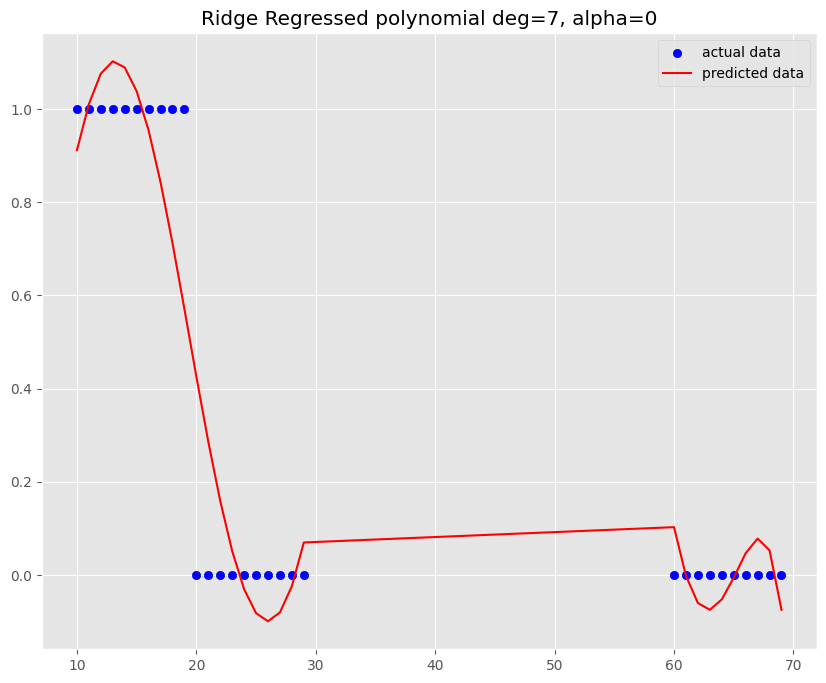


 Coefficients obtained

[ 0.00000000e+00 -1.75997869e+00  3.04016570e-01 -2.33001328e-02
  8.92832856e-04 -1.77907205e-05  1.76335535e-07 -6.87364585e-10]




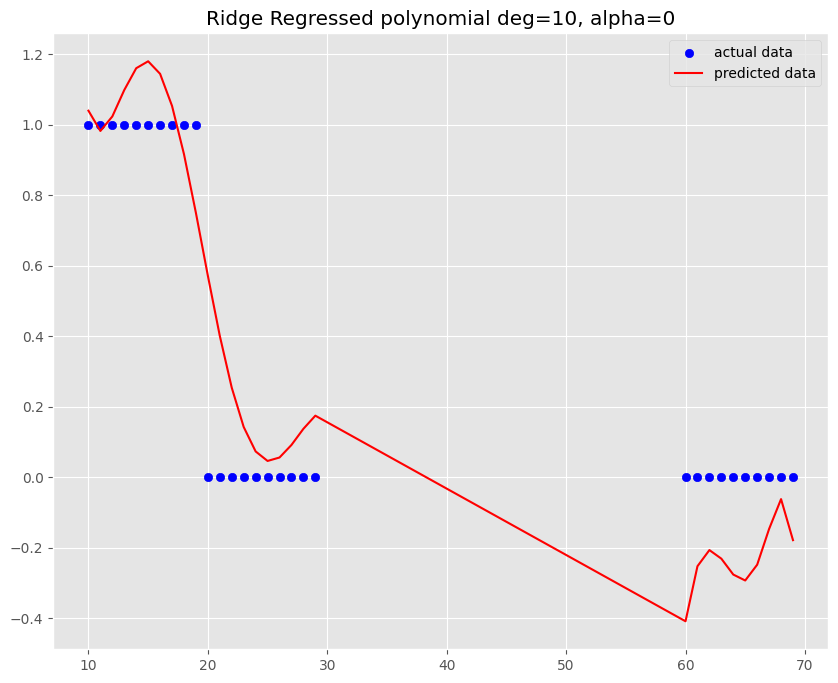


 Coefficients obtained

[ 0.00000000e+00  3.67702802e-03 -1.21309111e+00  2.41930565e-01
 -2.20773052e-02  1.14442932e-03 -3.61753993e-05  7.09082394e-07
 -8.40457153e-09  5.51416194e-11 -1.53682795e-13]




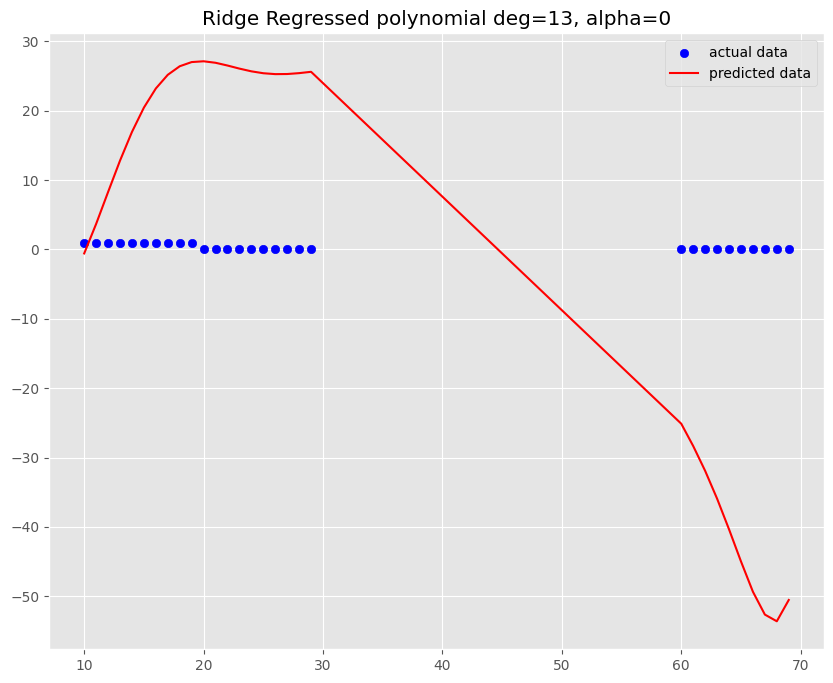


 Coefficients obtained

[ 0.00000000e+00 -1.35142119e-07 -1.66862650e-03 -4.61669010e-01
  1.27429288e-01 -1.49680045e-02  1.00043912e-03 -4.24409388e-05
  1.19926663e-06 -2.29305743e-08  2.93635607e-10 -2.41455362e-12
  1.15306220e-14 -2.43146321e-17]




In [164]:
#Ridge
alpha = 0 #@param {type:"slider", min:0, max:1, step:0.0001}

for deg in range(1,14,3):
  ridge_regression(x,y,deg,alpha=alpha)

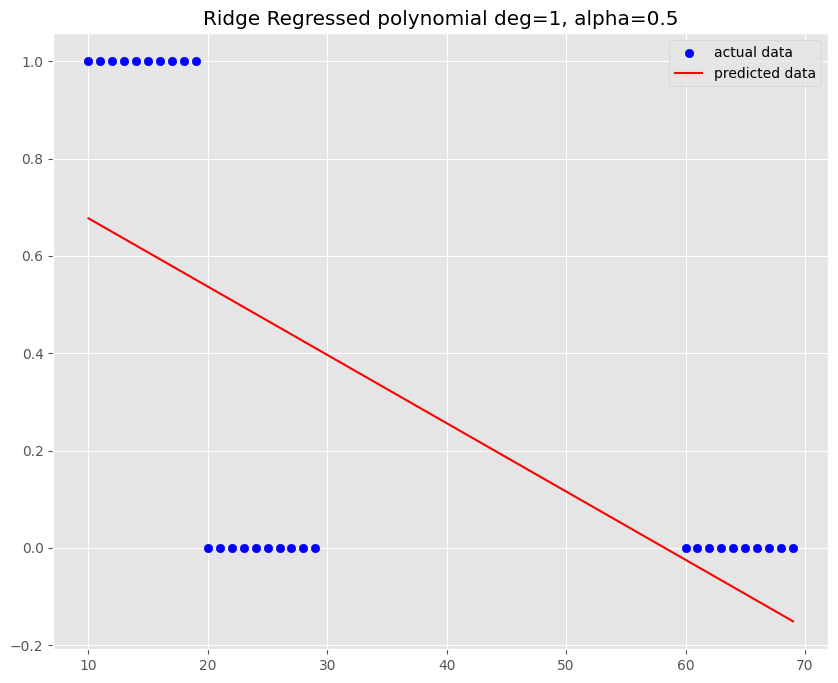


 Coefficients obtained

[ 0.         -0.01403706]




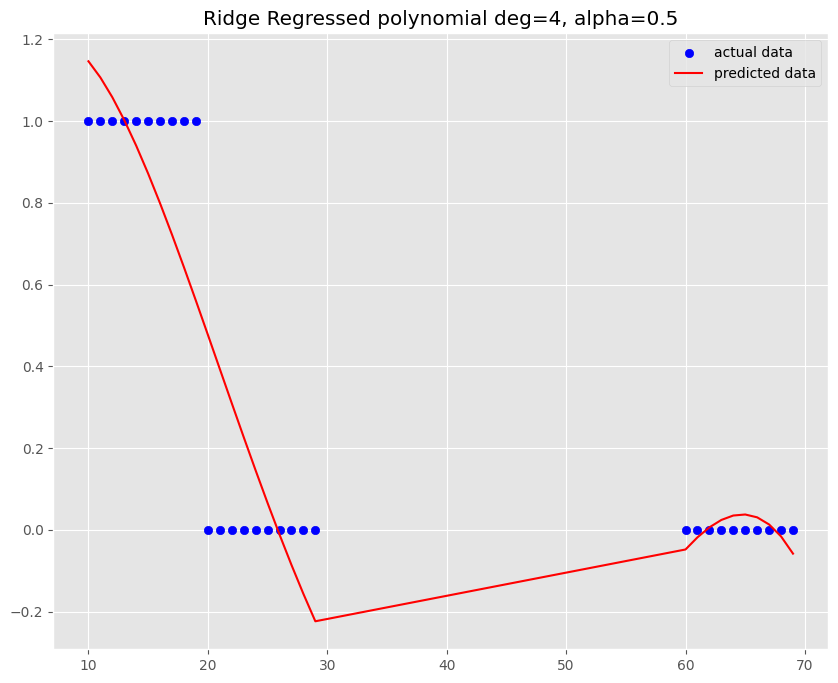


 Coefficients obtained

[ 0.00000000e+00  1.25498258e-01 -1.14936558e-02  2.53866008e-04
 -1.68512434e-06]




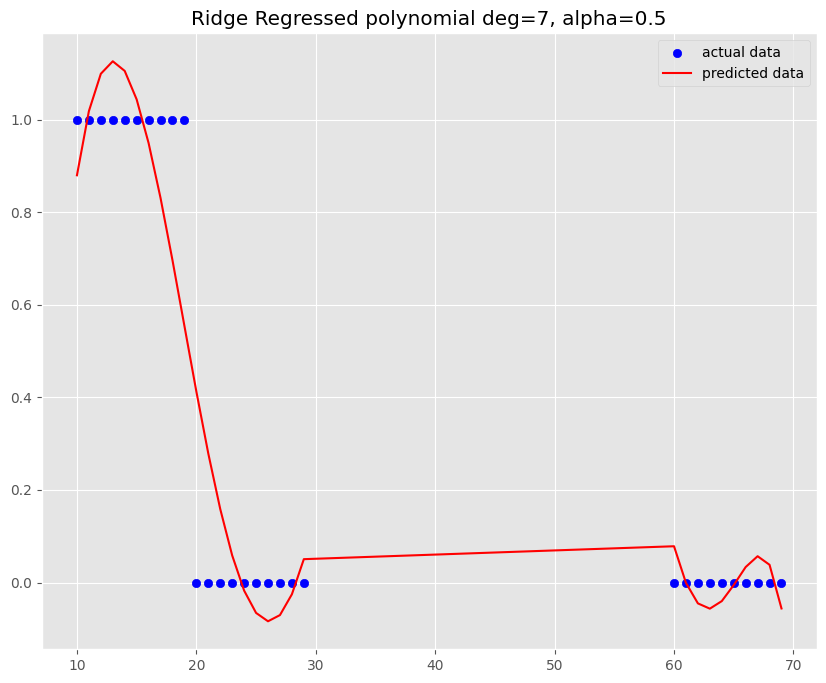


 Coefficients obtained

[ 0.00000000e+00  3.88402656e-03  1.04664485e-01 -1.17508819e-02
  5.22785368e-04 -1.12223257e-05  1.16071779e-07 -4.64723108e-10]




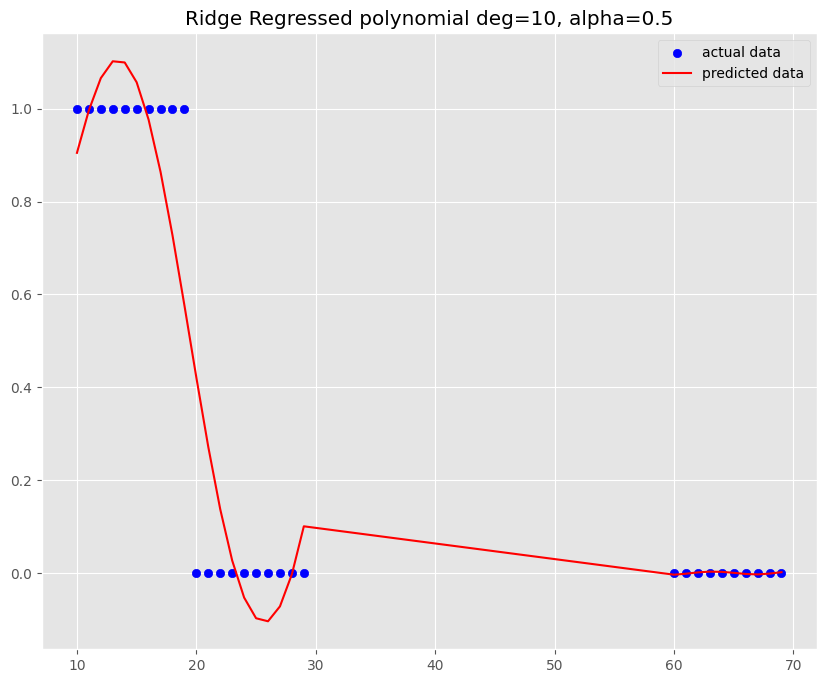


 Coefficients obtained

[ 0.00000000e+00 -2.57283204e-02 -1.40778134e-01  3.40627875e-02
 -3.38098137e-03  1.78198628e-04 -5.49798057e-06  1.02767152e-07
 -1.14734267e-09  7.04963235e-12 -1.83635175e-14]




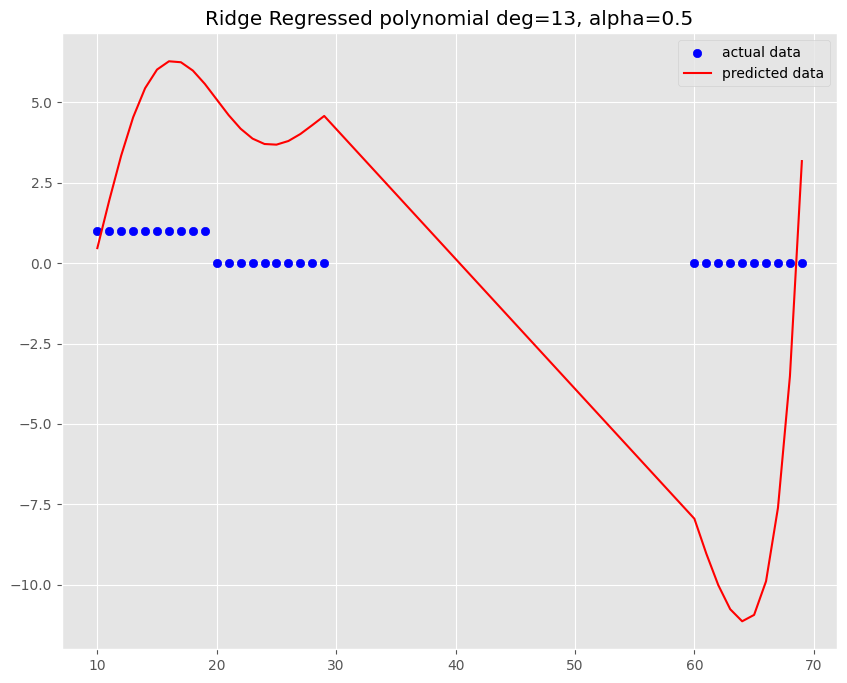


 Coefficients obtained

[ 0.00000000e+00 -6.96254122e-08 -2.54858159e-04 -1.09873952e-01
  3.40272554e-02 -4.25703632e-03  2.93619989e-04 -1.25661908e-05
  3.52051851e-07 -6.58260981e-09  8.15234630e-11 -6.42543249e-13
  2.91933877e-15 -5.81970757e-18]




In [165]:
alpha = 0.5 #@param {type:"slider", min:0, max:1, step:0.0001}

for deg in range(1,14,3):
  ridge_regression(x,y,deg,alpha=alpha)

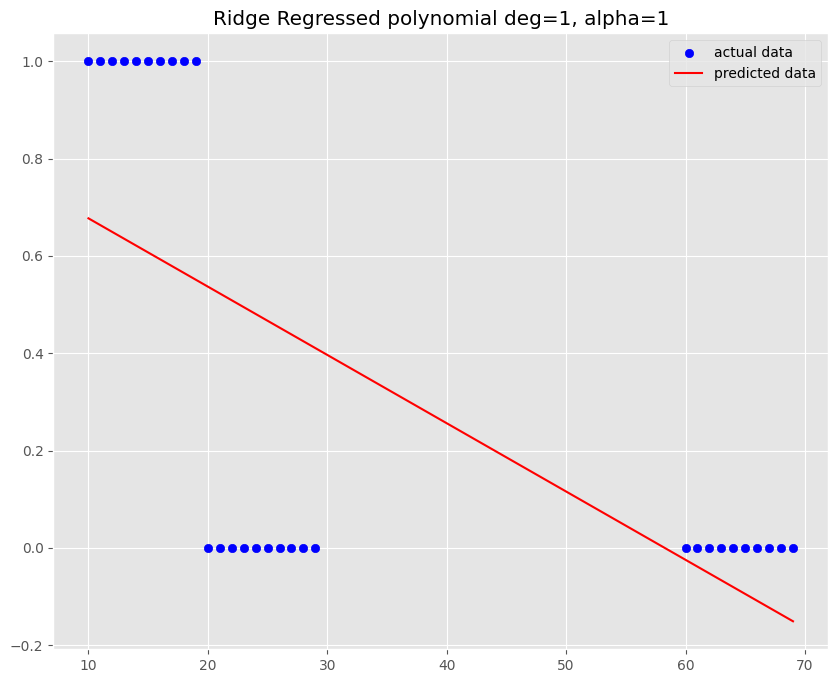


 Coefficients obtained

[ 0.         -0.01403657]




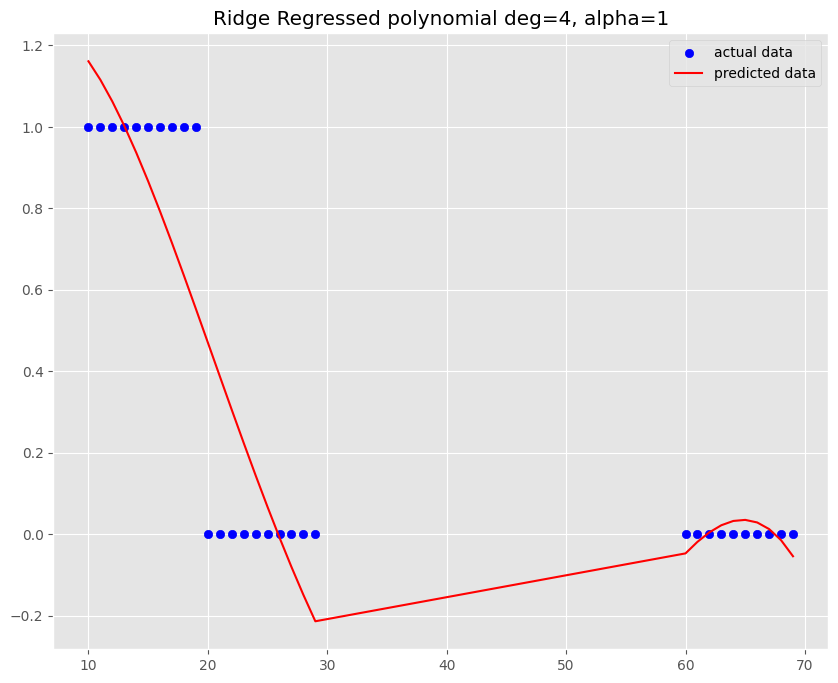


 Coefficients obtained

[ 0.00000000e+00  1.03327252e-01 -1.04428210e-02  2.34978594e-04
 -1.57101972e-06]




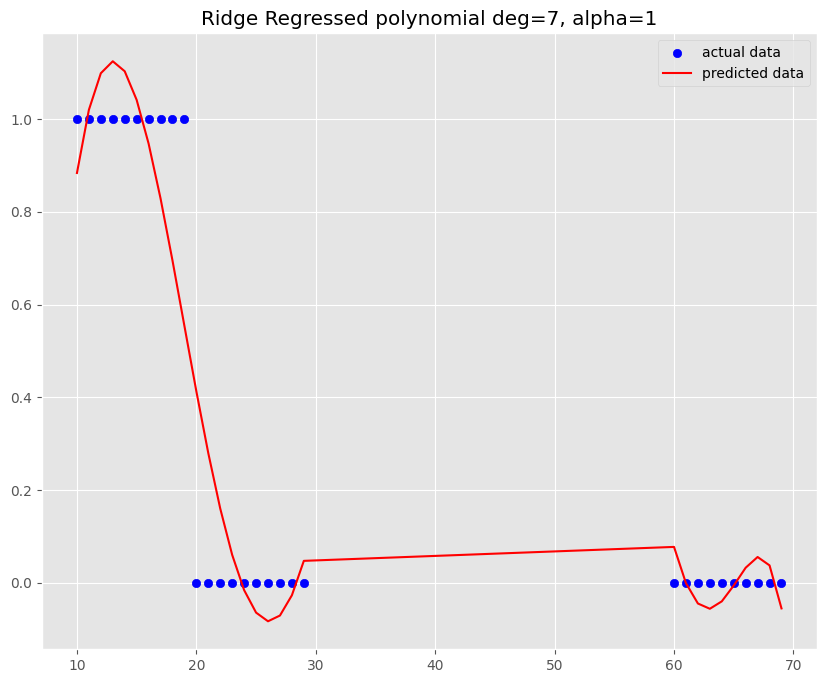


 Coefficients obtained

[ 0.00000000e+00  7.64562594e-03  1.02896285e-01 -1.15805615e-02
  5.15537824e-04 -1.10688596e-05  1.14488544e-07 -4.58372135e-10]




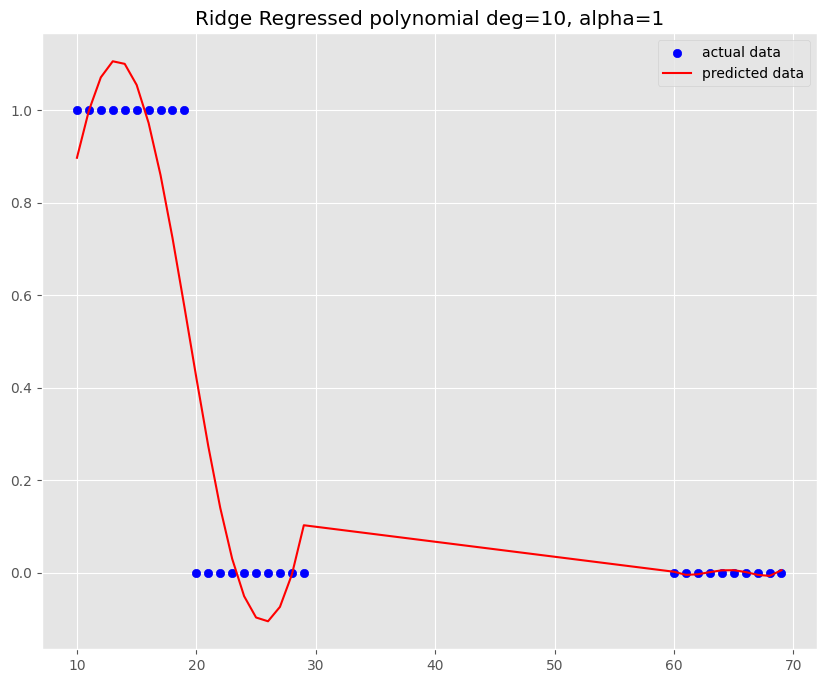


 Coefficients obtained

[ 0.00000000e+00 -1.36843473e-02 -7.48099720e-02  2.10224540e-02
 -2.19831521e-03  1.16753208e-04 -3.53972630e-06  6.39547602e-08
 -6.81780467e-10  3.95925386e-12 -9.65622809e-15]




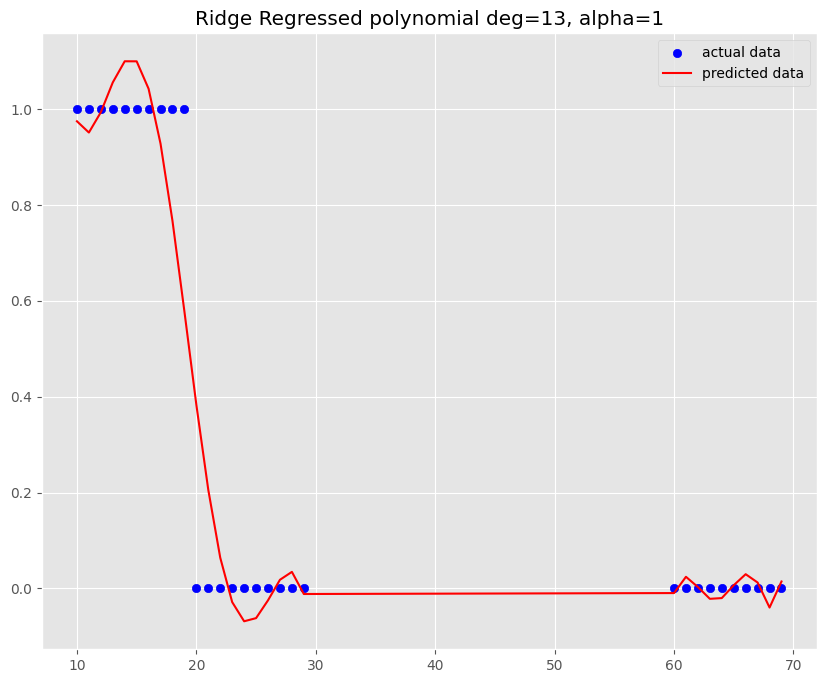


 Coefficients obtained

[ 0.00000000e+00 -1.54709349e-02 -1.08796192e-01 -3.61726595e-02
  1.16323771e-02 -1.28861249e-03  7.54961780e-05 -2.58516999e-06
  5.16002376e-08 -5.14583265e-10 -4.22890484e-14  5.81018181e-14
 -5.62258551e-16  1.79518907e-18]




In [166]:
alpha = 1 #@param {type:"slider", min:0, max:1, step:0.0001}

for deg in range(1,14,3):
  ridge_regression(x,y,deg,alpha=alpha)

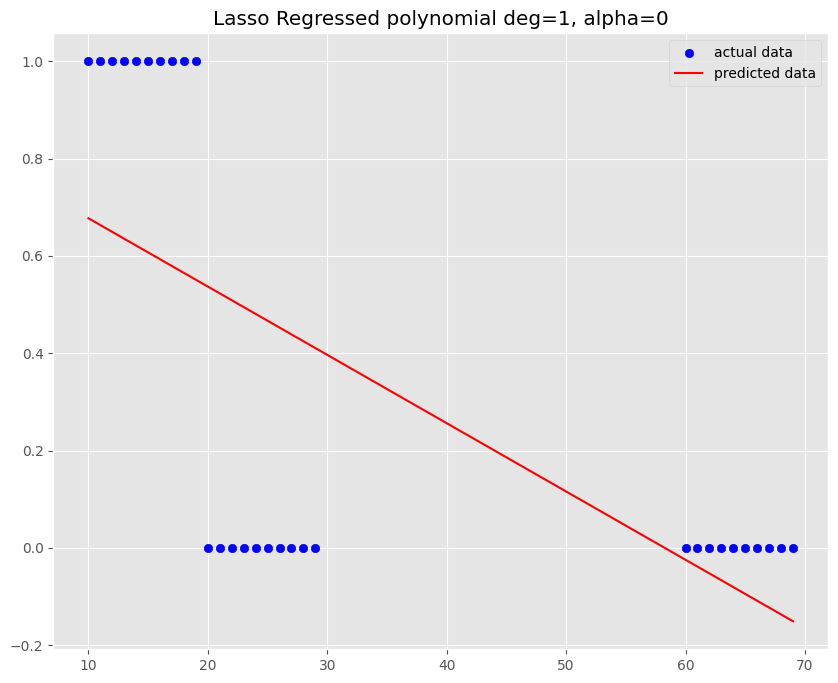


 Coefficients obtained

[ 0.         -0.01403755]




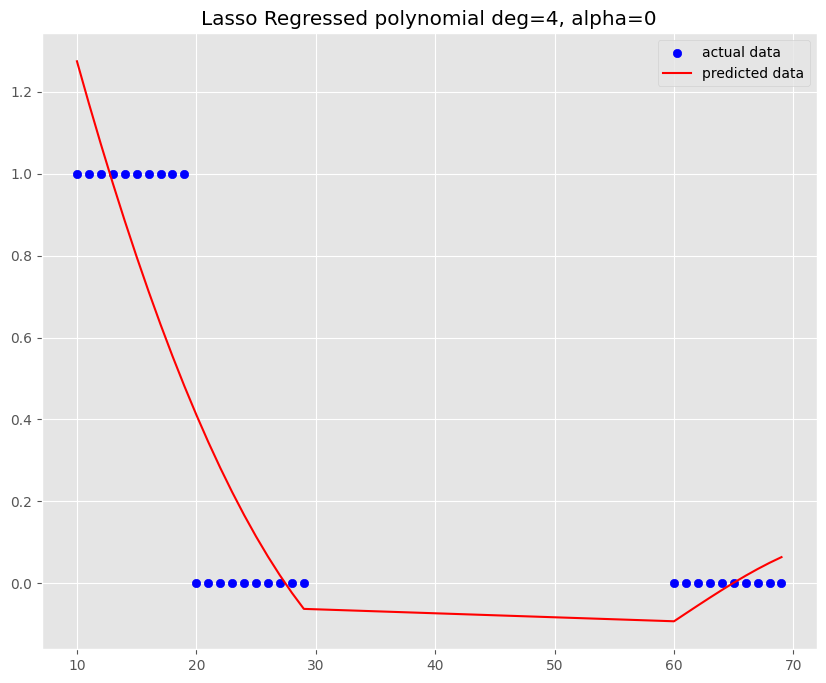


 Coefficients obtained

[ 0.00000000e+00 -1.40990930e-01  1.76626621e-03  5.17199978e-06
 -1.24351524e-07]




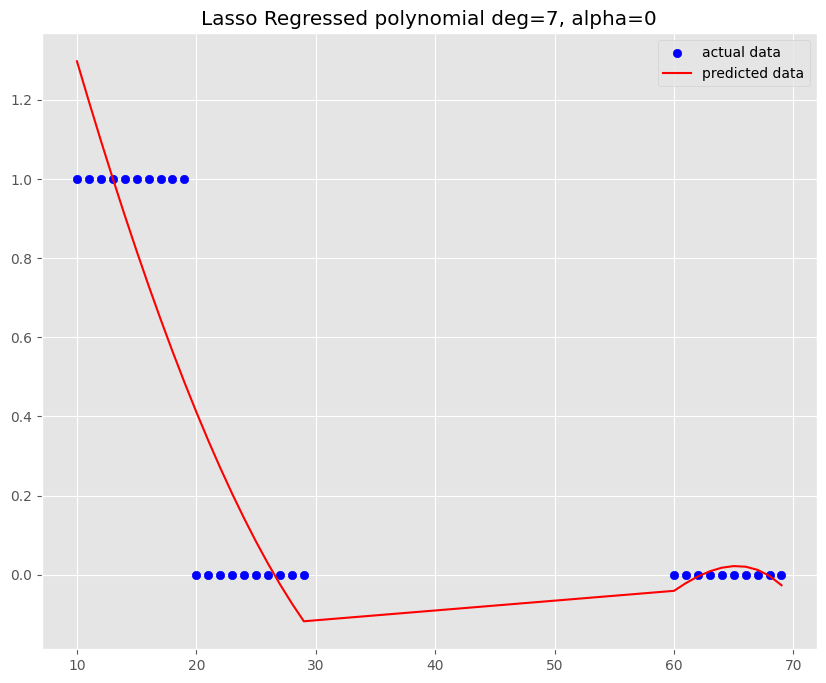


 Coefficients obtained

[ 0.00000000e+00 -1.25915855e-01  1.02606411e-03  8.70851225e-06
  3.69826074e-08 -2.29335024e-10 -8.41007573e-12 -1.47862012e-13]




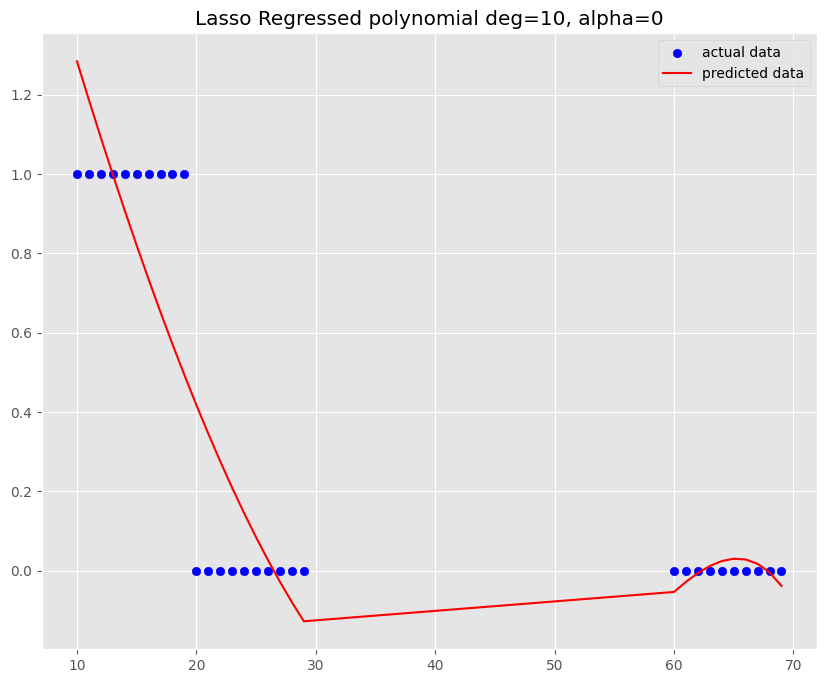


 Coefficients obtained

[ 0.00000000e+00 -1.17160340e-01  8.13209377e-04  7.84779408e-06
  4.44935751e-08  4.55563304e-11 -3.09697553e-12 -6.02283517e-14
 -8.39169817e-16 -1.02001442e-17 -1.12145461e-19]




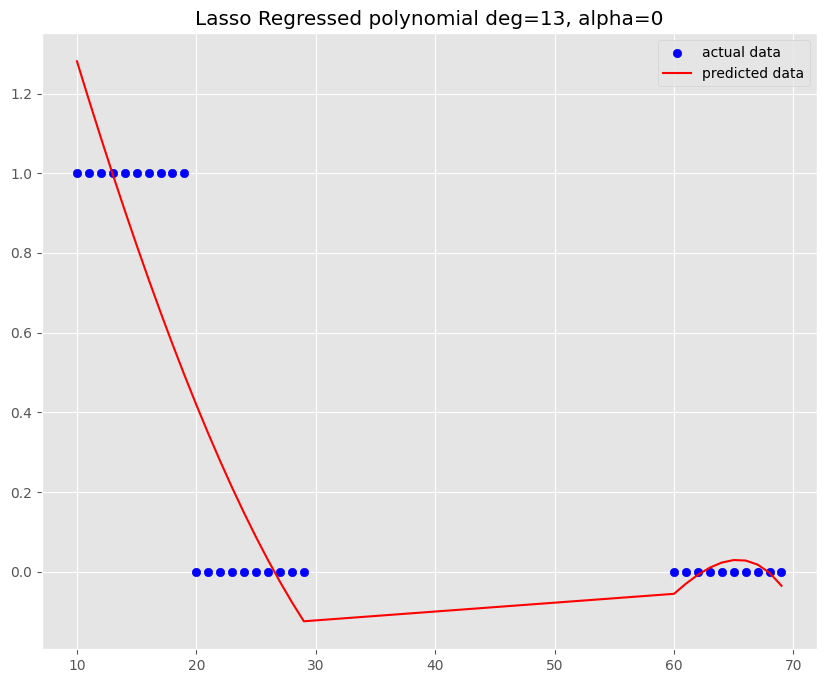


 Coefficients obtained

[ 0.00000000e+00 -1.16701210e-01  8.14429810e-04  7.75601859e-06
  4.32679411e-08  3.64132676e-11 -3.09102445e-12 -5.82700781e-14
 -7.86104505e-16 -9.10401891e-18 -9.19098713e-20 -7.35616120e-22
 -2.27551479e-24  8.17105174e-26]




In [167]:
#Lasso
alpha = 0 #@param {type:"slider", min:0, max:0.01, step:0.001}

for deg in range(1,14,3):
  lasso_regression(x,y,deg,alpha=alpha)

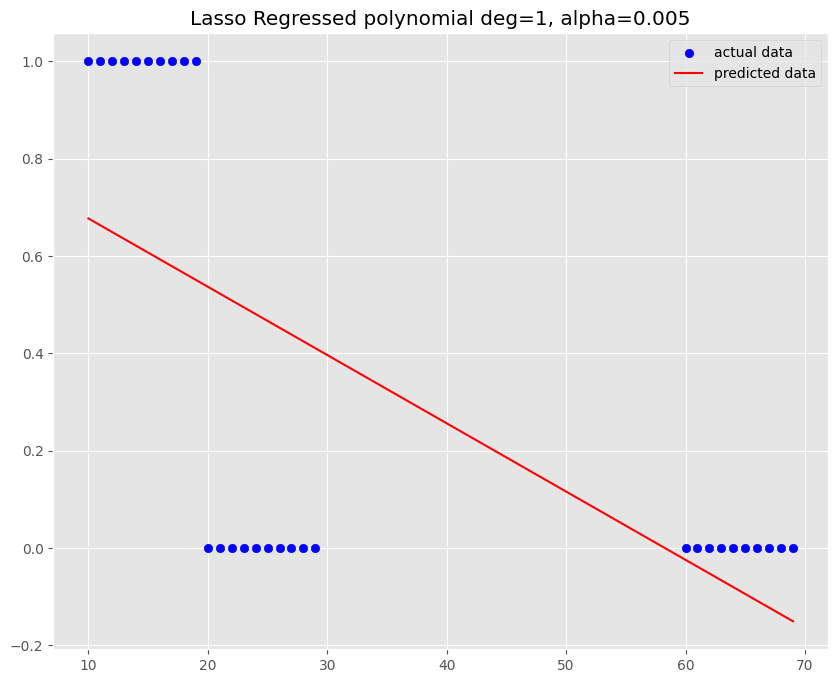


 Coefficients obtained

[ 0.         -0.01402702]




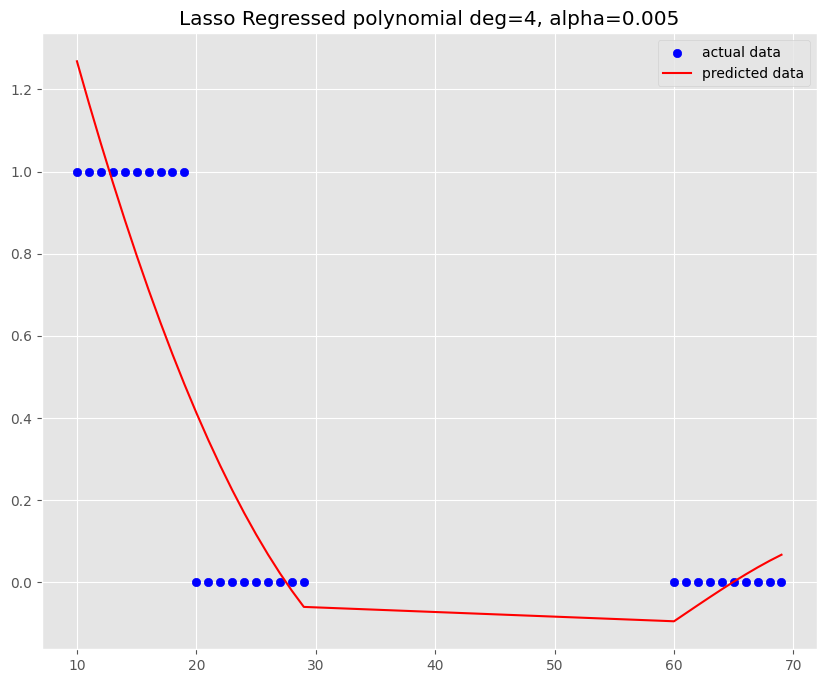


 Coefficients obtained

[ 0.00000000e+00 -1.38973505e-01  1.71093912e-03  5.57978055e-06
 -1.23763018e-07]




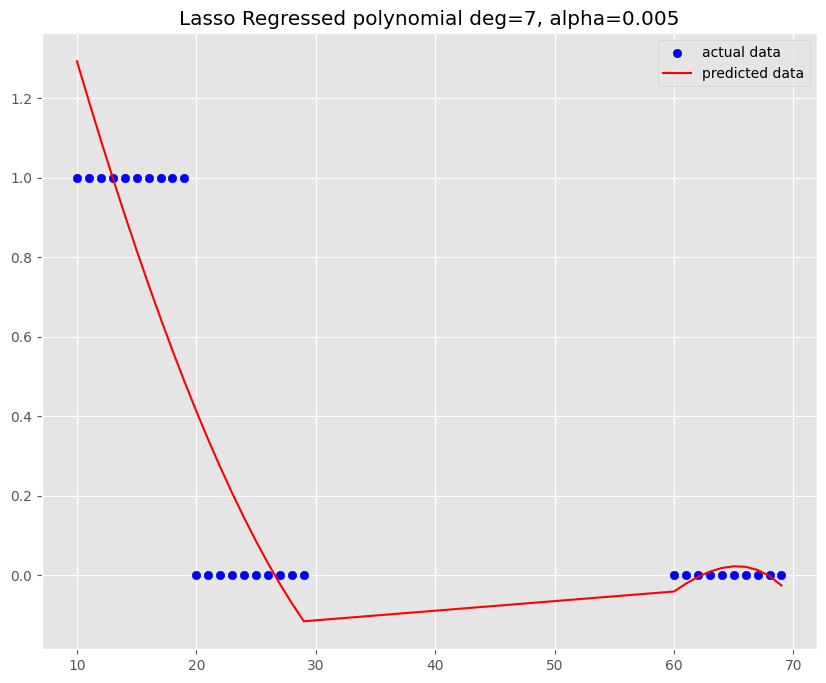


 Coefficients obtained

[ 0.00000000e+00 -1.23951006e-01  9.66536872e-04  9.16403047e-06
  3.90974480e-08 -2.26318312e-10 -8.53998530e-12 -1.50786170e-13]




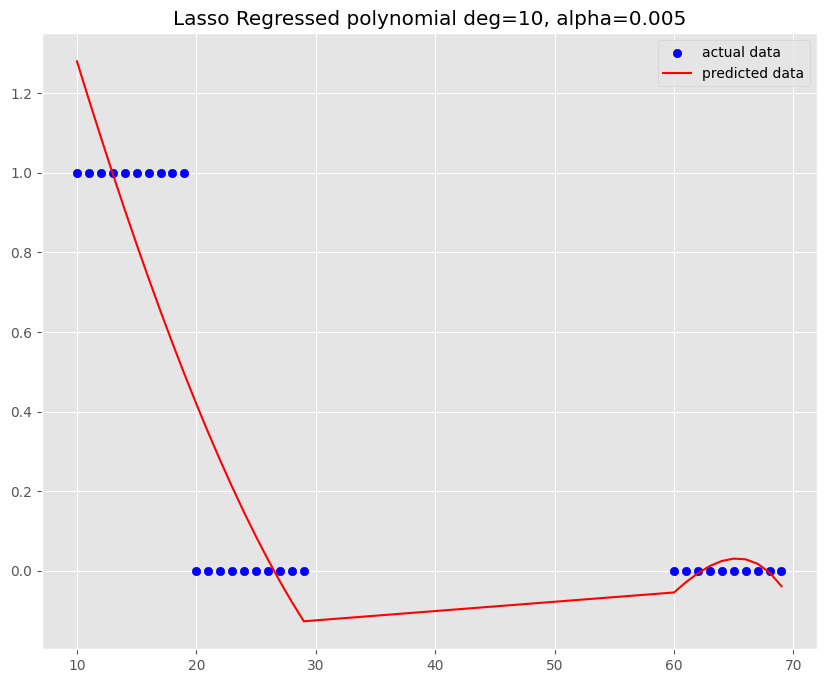


 Coefficients obtained

[ 0.00000000e+00 -1.15039207e-01  7.48867488e-04  8.28860933e-06
  4.68463560e-08  5.55004780e-11 -3.10058863e-12 -6.11333082e-14
 -8.56621258e-16 -1.04664049e-17 -1.15891794e-19]




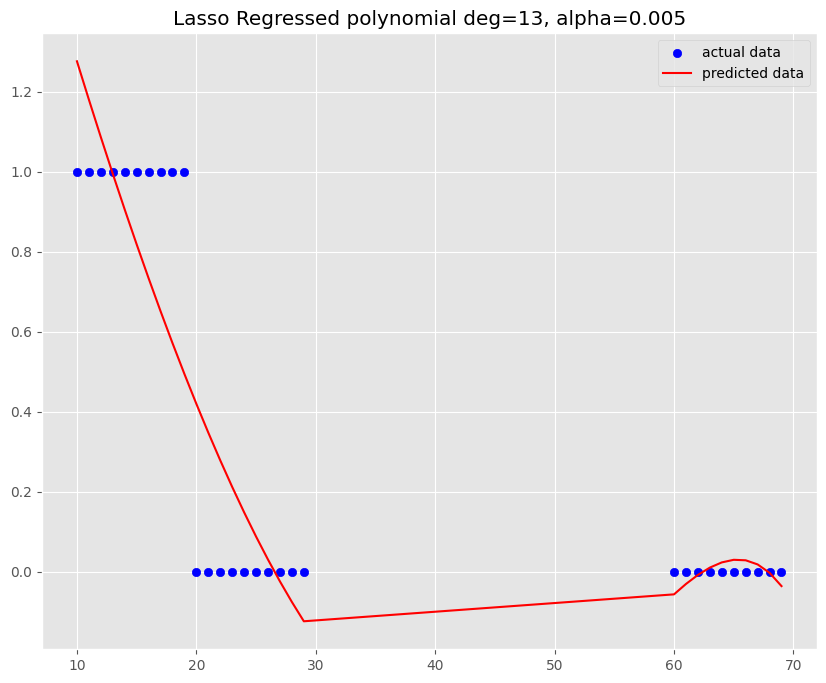


 Coefficients obtained

[ 0.00000000e+00 -1.14519649e-01  7.48683157e-04  8.18884307e-06
  4.56171317e-08  4.72679559e-11 -3.07320291e-12 -5.87902445e-14
 -7.97257049e-16 -9.27140107e-18 -9.41393035e-20 -7.63465870e-22
 -2.60643740e-24  7.79843900e-26]




In [168]:
alpha = 0.005 #@param {type:"slider", min:0, max:0.01, step:0.001}

for deg in range(1,14,3):
  lasso_regression(x,y,deg,alpha=alpha)

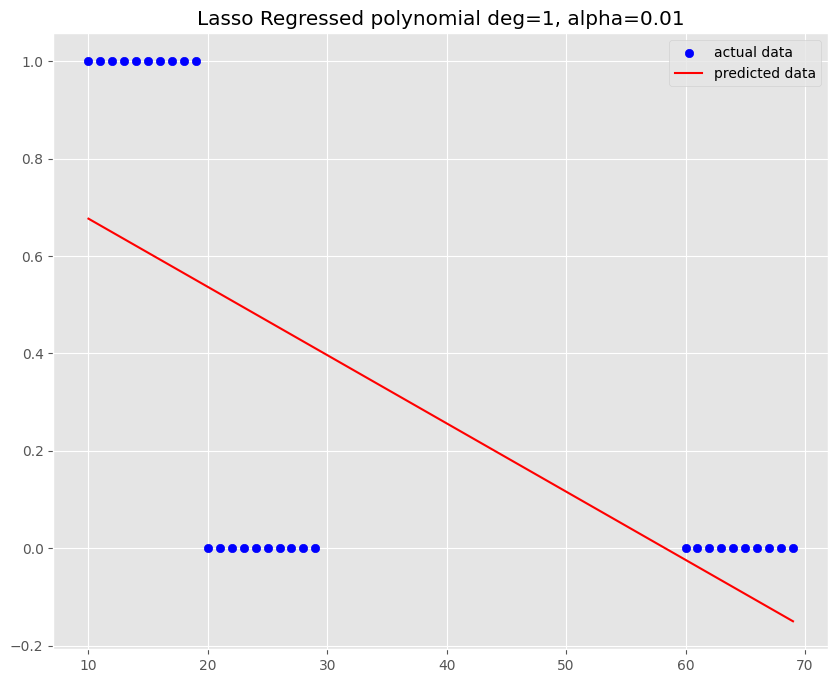


 Coefficients obtained

[ 0.         -0.01401649]




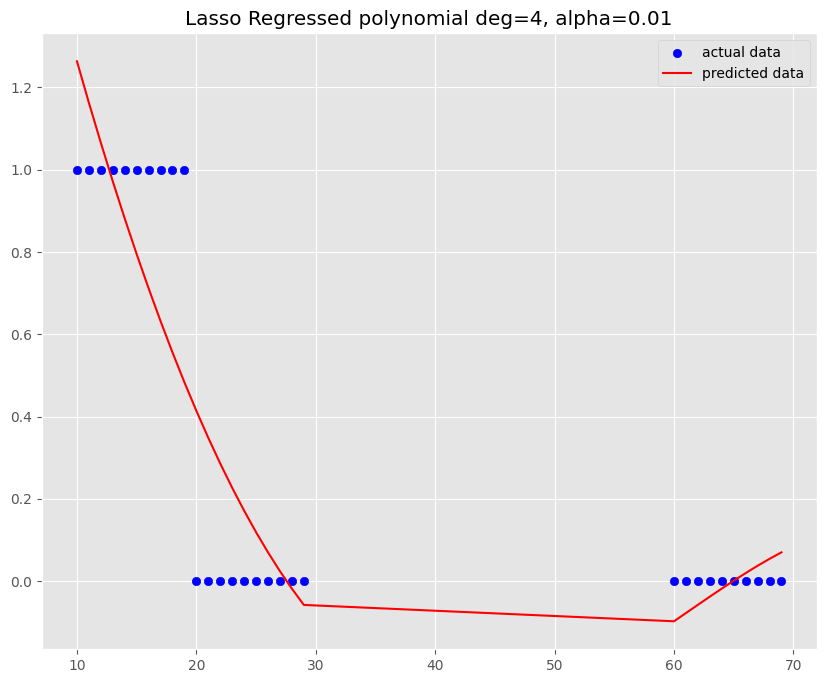


 Coefficients obtained

[ 0.00000000e+00 -1.36956080e-01  1.65561202e-03  5.98756134e-06
 -1.23174513e-07]




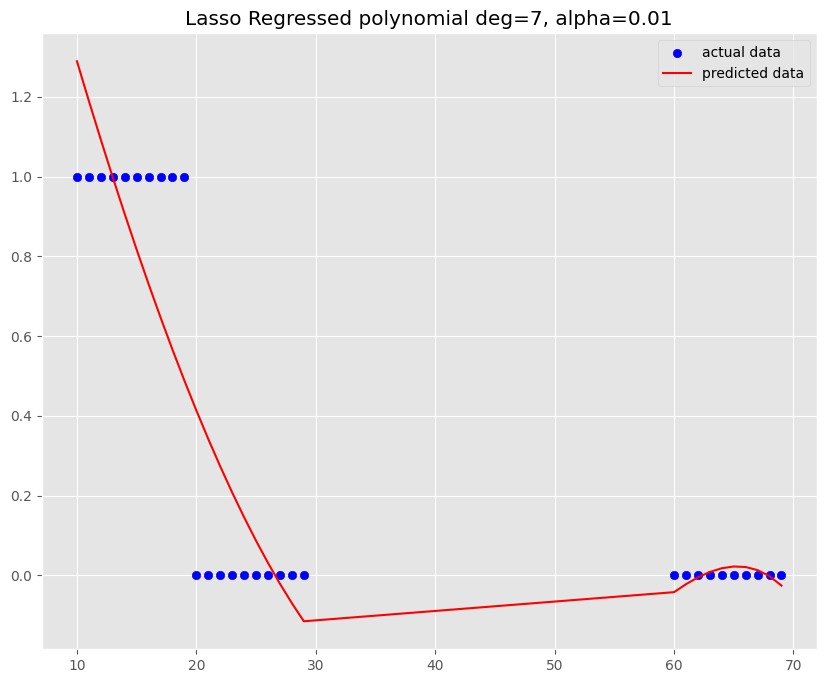


 Coefficients obtained

[ 0.00000000e+00 -1.21986158e-01  9.07009635e-04  9.61954870e-06
  4.12122887e-08 -2.23301600e-10 -8.66989486e-12 -1.53710328e-13]




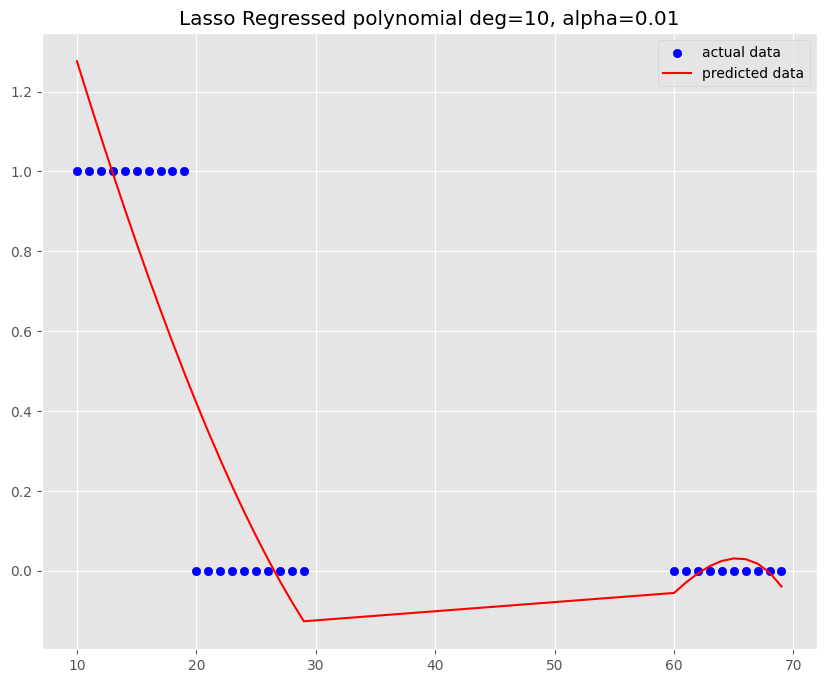


 Coefficients obtained

[ 0.00000000e+00 -1.12918075e-01  6.84525600e-04  8.72942458e-06
  4.91991369e-08  6.54446256e-11 -3.10420172e-12 -6.20382648e-14
 -8.74072700e-16 -1.07326657e-17 -1.19638127e-19]




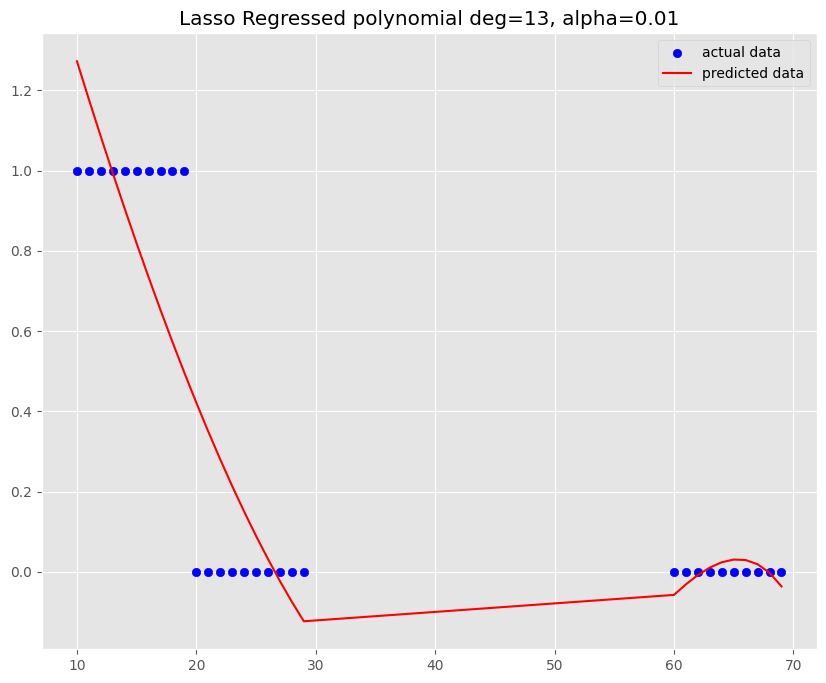


 Coefficients obtained

[ 0.00000000e+00 -1.12338089e-01  6.82936505e-04  8.62166756e-06
  4.79663223e-08  5.81226442e-11 -3.05538137e-12 -5.93104110e-14
 -8.08409593e-16 -9.43878322e-18 -9.63687358e-20 -7.91315619e-22
 -2.93736001e-24  7.42582627e-26]




In [169]:
alpha = 0.01 #@param {type:"slider", min:0, max:0.01, step:0.001}

for deg in range(1,14,3):
  lasso_regression(x,y,deg,alpha=alpha)

**Observations:**
- For Ridge Regression, increasing alpha leads to underfitting as it excessively reduces the magnitude of the coefficients.
- For Lasso Regression, a high alpha forces many coefficients to zero, resulting in underfitting due to oversimplification of the model.

**Part - 2:** **Ridge and LASSO Regularization on iris dataset**

In [170]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
print(iris.data[:5])


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [171]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df.dropna(inplace=True)

# Check for missing values
iris_df.isnull().any().any()


False

In [172]:
def lin_regression(x,y,show=True):

  # learning the coefficient and intercept

  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

  m1 = LinearRegression()
  m1.fit(x_train,y_train)

  y_pred = m1.predict(x_test)
  metrics.mean_squared_error(y_pred,y_test)

  # plotting data and predictions

  if show:

    print("The coefficients are: \n {} \n\n The intercept is: {}\n".format(m1.coef_,m1.intercept_))
    print("The RMSE for linear regression is: {}".format(math.sqrt(metrics.mean_squared_error(y_pred,y_test))))

# **SVM regression:**
1) Play around with the value of epsilon and plot the different regression curves obtained.

2) Change C and analyze the different plots obtained.

In [173]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
import sklearn.datasets as datasets


import plotly.graph_objects as go
import plotly.express as px


data = datasets.load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)

scaler=MinMaxScaler()
for col in df.columns[:-1]:
  df[col]=scaler.fit_transform(df[[col]])

In [174]:
X=df[df.columns[2]].values.reshape(-1,1)
y=df[df.columns[-1]].values

model1 = LinearRegression()
lr = model1.fit(X, y)
epsilon_values = np.linspace(0, 1, 5)

for epsilon in epsilon_values:
    model2 = SVR(kernel='rbf', C=1, epsilon=epsilon)
    svr = model2.fit(X, y)

In [175]:
X=df[df.columns[2]].values.reshape(-1,1)
y=df[df.columns[-1]].values

model1 = LinearRegression()
lr = model1.fit(X, y)

epsilon = 0
model2 = SVR(kernel='rbf', C=1, epsilon=epsilon)
svr = model2.fit(X, y)

In [176]:
x_range = np.linspace(X.min(), X.max(), 100)

y_lr = model1.predict(x_range.reshape(-1, 1))
y_svr = model2.predict(x_range.reshape(-1, 1))

In [177]:
fig = px.scatter(df, x=df[df.columns[2]], y=df[df.columns[-1]],
                 opacity=0.8, color_discrete_sequence=['black'])

fig.add_traces(go.Scatter(x=x_range, y=y_lr, name='Linear Regression', line=dict(color='limegreen')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr, name='Support Vector Regression', line=dict(color='red')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr+epsilon, name='+epsilon', line=dict(color='red', dash='dot')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr-epsilon, name='-epsilon', line=dict(color='red', dash='dot')))

fig.update_layout(dict(plot_bgcolor = 'white'))


fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey',
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey',
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey',
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey',
                 showline=True, linewidth=1, linecolor='black')

fig.update_traces(marker=dict(size=3))

fig.show()

In [178]:
X=df[df.columns[2]].values.reshape(-1,1)
y=df[df.columns[-1]].values

model1 = LinearRegression()
lr = model1.fit(X, y)

epsilon = 1
model2 = SVR(kernel='rbf', C=1, epsilon=epsilon)
svr = model2.fit(X, y)

In [179]:
x_range = np.linspace(X.min(), X.max(), 100)

y_lr = model1.predict(x_range.reshape(-1, 1))
y_svr = model2.predict(x_range.reshape(-1, 1))

In [180]:
fig = px.scatter(df, x=df[df.columns[2]], y=df[df.columns[-1]],
                 opacity=0.8, color_discrete_sequence=['black'])

fig.add_traces(go.Scatter(x=x_range, y=y_lr, name='Linear Regression', line=dict(color='limegreen')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr, name='Support Vector Regression', line=dict(color='red')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr+epsilon, name='+epsilon', line=dict(color='red', dash='dot')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr-epsilon, name='-epsilon', line=dict(color='red', dash='dot')))

fig.update_layout(dict(plot_bgcolor = 'white'))


fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey',
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey',
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey',
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey',
                 showline=True, linewidth=1, linecolor='black')

fig.update_traces(marker=dict(size=3))

fig.show()

**Observations**: As the value of epsilon increases from 0 to 1, it is moving away from the support vectors. Hence, it leads to underfitting.

**Part - 2:** **Exploring the changes in C**
- Low
C: When
C is small, the model becomes too simple, and it doesn't capture the data well, leading to lower performance.

- High C: When C is large, the model tries too hard to fit the data, causing it to memorize the training data and not generalize well, which can lower the test performance.

### **Logistic regression:**
1. Run logistic regression on different datasets and assess the results.


In [190]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

iris = load_iris()
X = iris.data
y = (iris.target != 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
print("Iris Dataset Results:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Iris Dataset Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0]
 [ 0 20]]
Accuracy: 1.0


### **Explore**
1. What all other algorithms can be used to predict the digit in MNIST dataset ? Learn more about Neural Networks and CNNs.
- CNN can be used to predict the digits in MNIST dataset. It uses multilayer perceptrons to do computational work.
- CNN uses relatively little pre-processing compared to other image classification algorithms. This means the network learns through filters that in traditional algorithms were hand-engineered.
- So, for the image processing tasks, CNNs are the best-suited option.

(Reference: https://www.geeksforgeeks.org/applying-convolutional-neural-network-on-mnist-dataset/)

## References

1. https://harish-reddy.medium.com/regularization-in-python-699cfbad8622
2. https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a
3. https://nextjournal.com/gkoehler/pytorch-mnist

## Further Explorations

1. https://en.wikipedia.org/wiki/Elastic_net_regularization
2. https://www.geeksforgeeks.org/neural-networks-a-beginners-guide/
3. https://www.geeksforgeeks.org/convolutional-neural-network-cnn-in-machine-learning/